https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

https://matplotlib.org/gallery.html

http://www.statsmodels.org/dev/graphics.html

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import numpy as np
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
data = datasets.load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Create dataframe of main data to use as predictors (later). AKA "X"
df = pd.DataFrame(data.data, columns=data.feature_names)

# target vector (MEDV)
target = data.target

df['PRICE'] = target

In [5]:
lm = linear_model.LinearRegression()
X = df[["RM"]]
y = target
y_log = np.log(y)

model = lm.fit(X, y)
y_pred = model.predict(X)
df['PRED'] = y_pred

In [6]:
df['PERC_PRICE']=df.PRICE/df.PRICE.sum()

In [7]:
##### Standardize all the variables in One step. But be careful !
####   All the variables must be numeric for this to work !!
scaler = StandardScaler()
np_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(np_norm, columns=df.columns)

In [8]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0  2.31   0.0   0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731  0.0   7.07   0.0   0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729  0.0   7.07   0.0   0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237  0.0   2.18   0.0   0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905  0.0   2.18   0.0   0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE       PRED  PERC_PRICE  
0  15.3     396.90  4.98   24.0   25.175746  0.002105    
1  17.8     396.90  9.14   21.6   23.774021  0.001894    
2  17.8     392.83  4.03   34.7   30.728032  0.003043    
3  18.7     394.63  2.94   33.4   29.025938  0.002929    
4  18.7     396.90  5.33   36.2   30.382152  0.003175

In [9]:
X, y, y_pred = df.RM.values, df.PRICE.values, df.PRED.values

/Users/aymeric_bdie/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/aymeric_bdie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/aymeric_bdie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


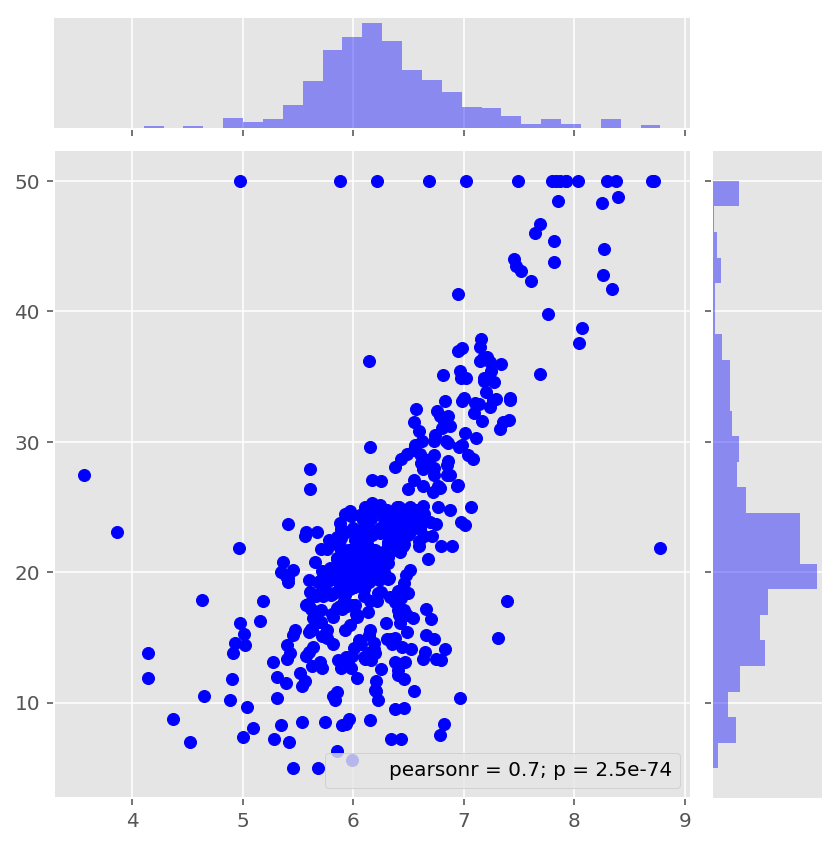

In [10]:
sns.jointplot(X, y, color='blue')

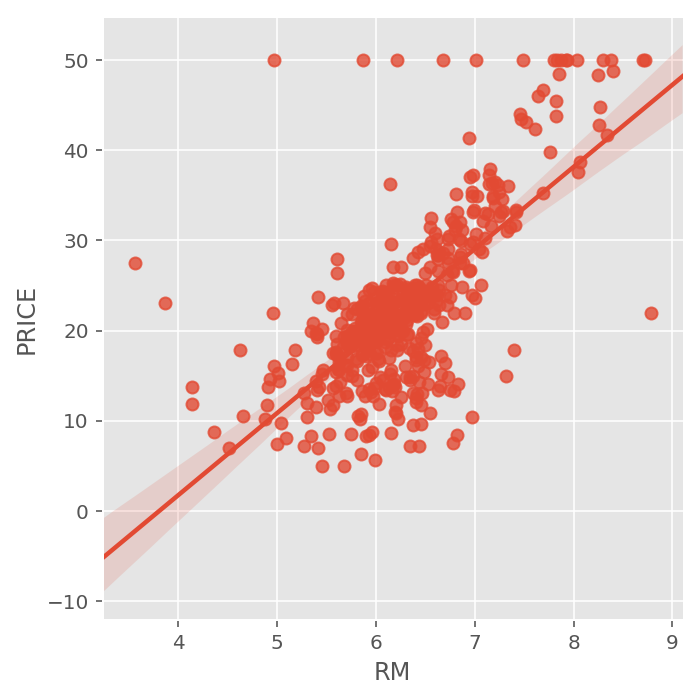

In [11]:
sns.lmplot(x='RM', y='PRICE', data=df)
plt.show()

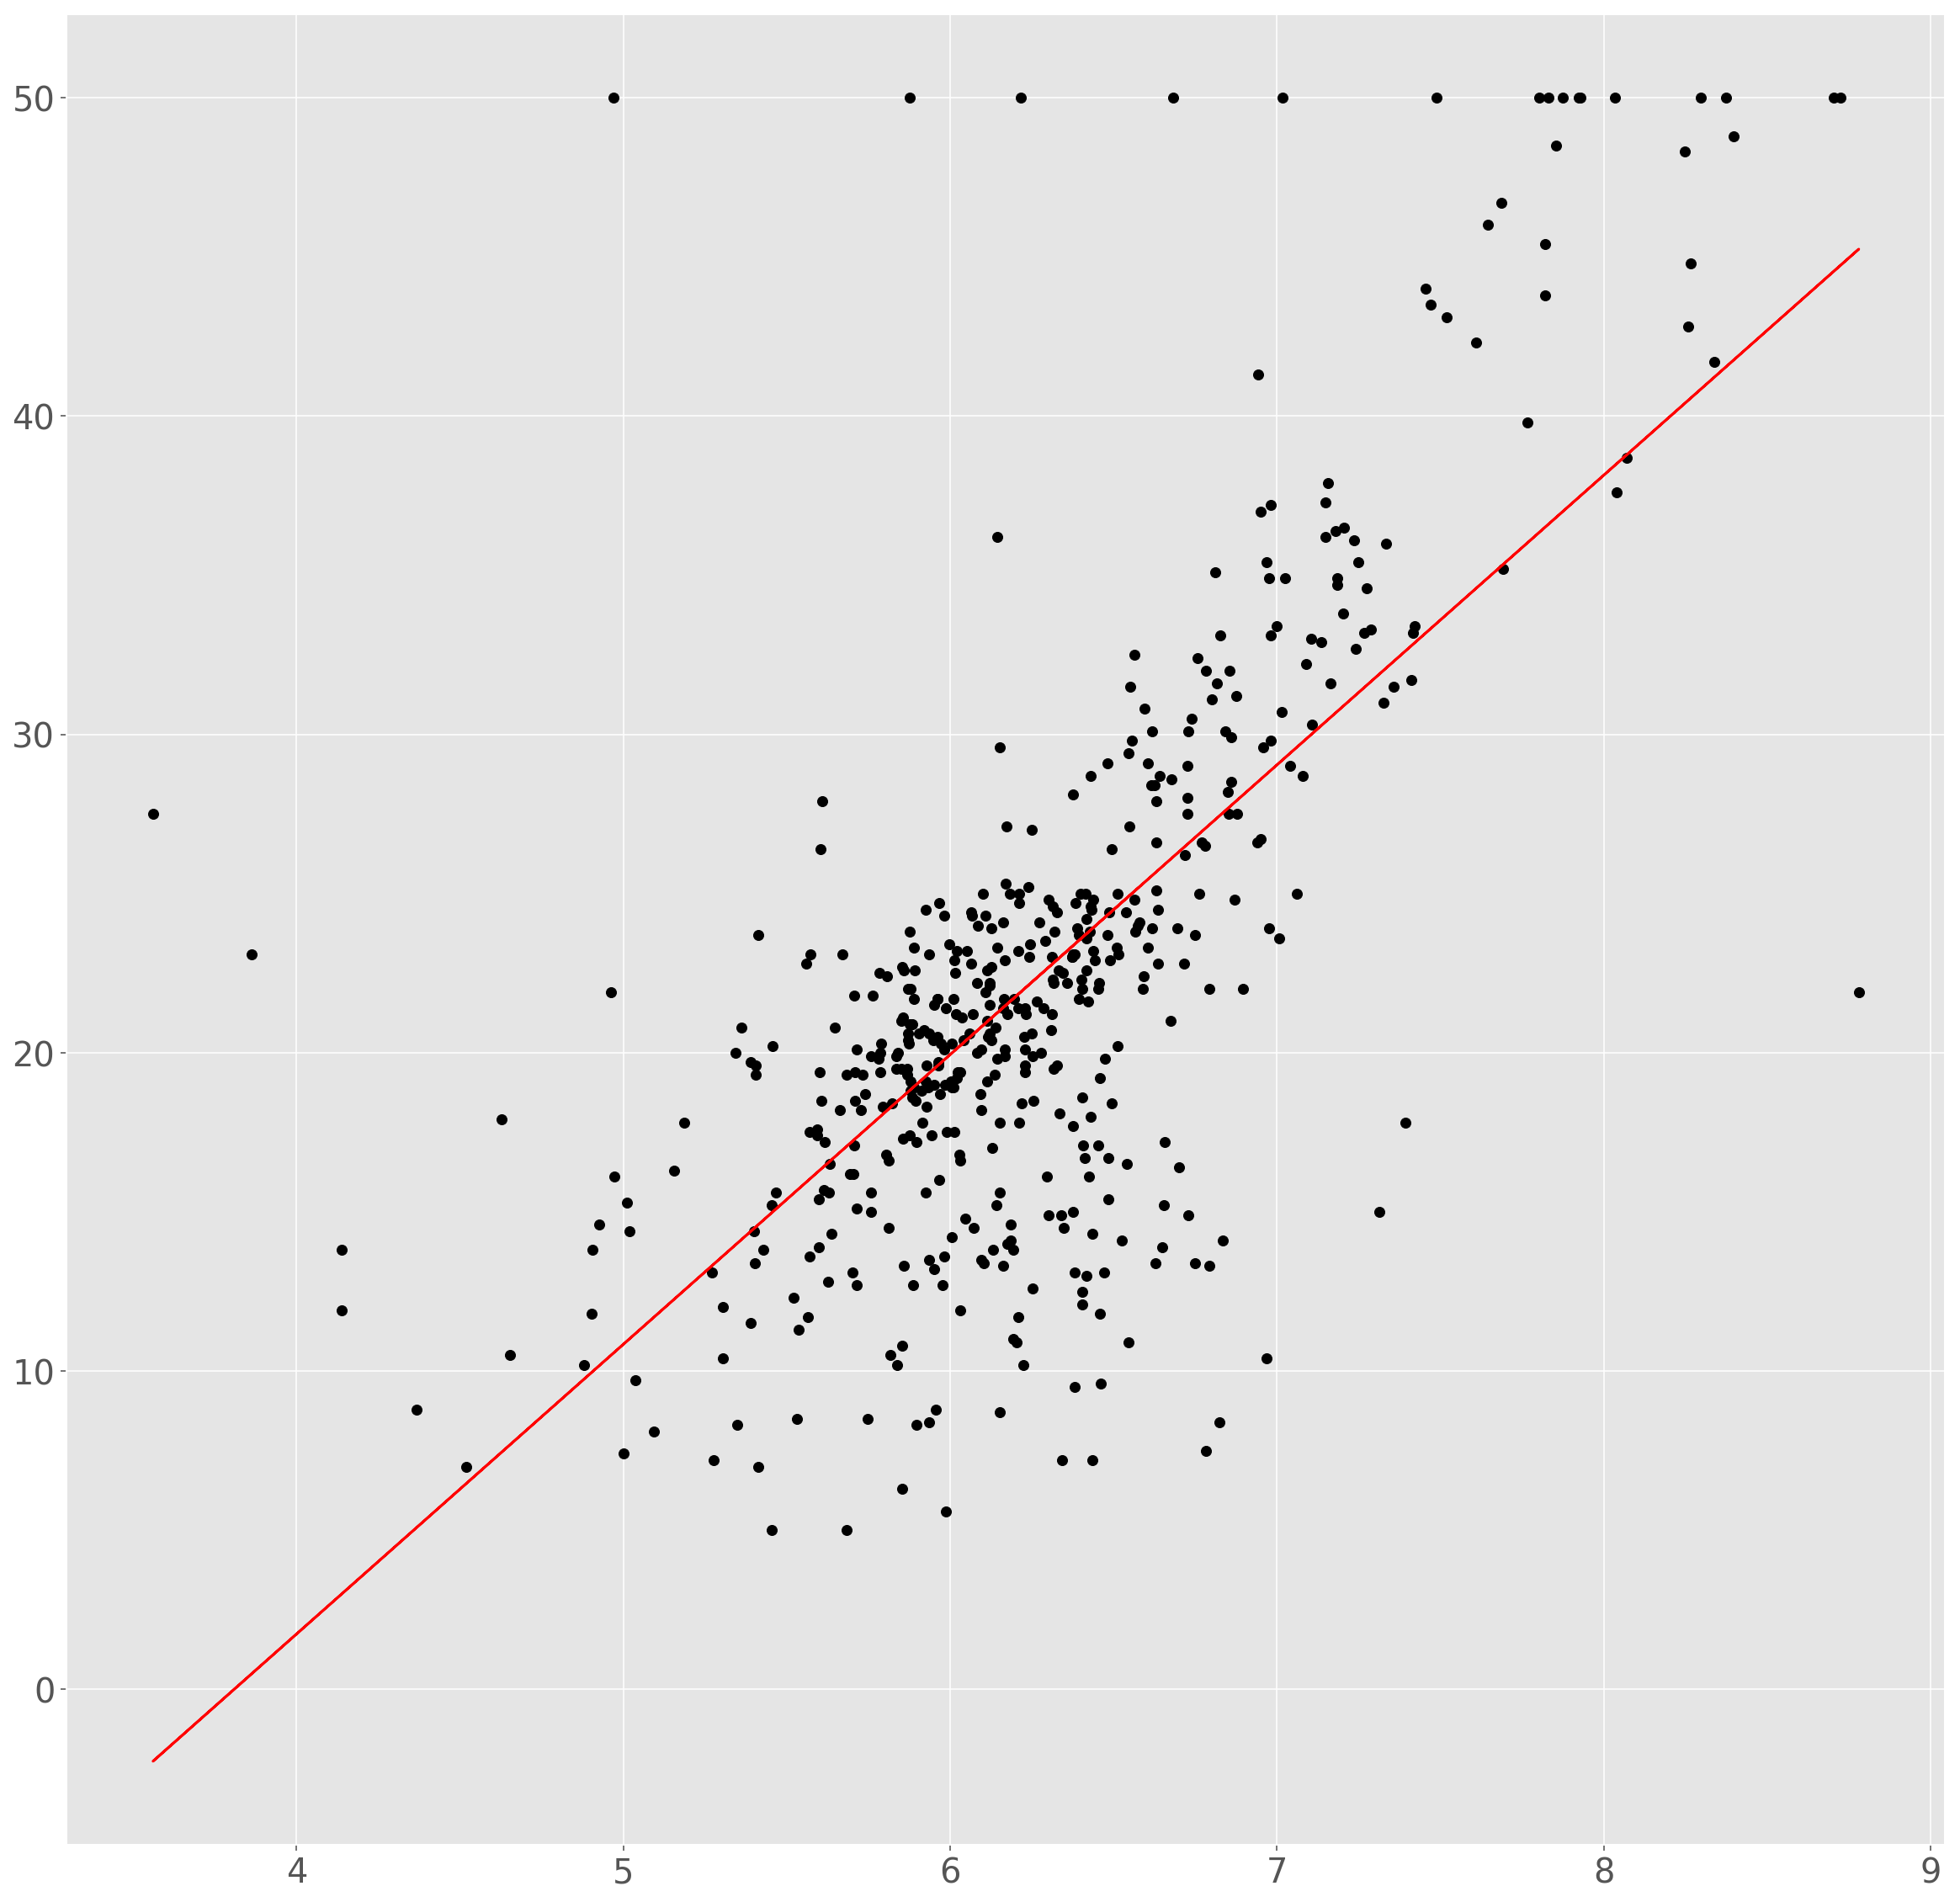

In [12]:
# Plot showing out linear forcast
fig = plt.figure(figsize=(20, 20))

# change the fontsize of minor ticks label
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(X, y, c='k')
ax.plot(X, y_pred, color='r')

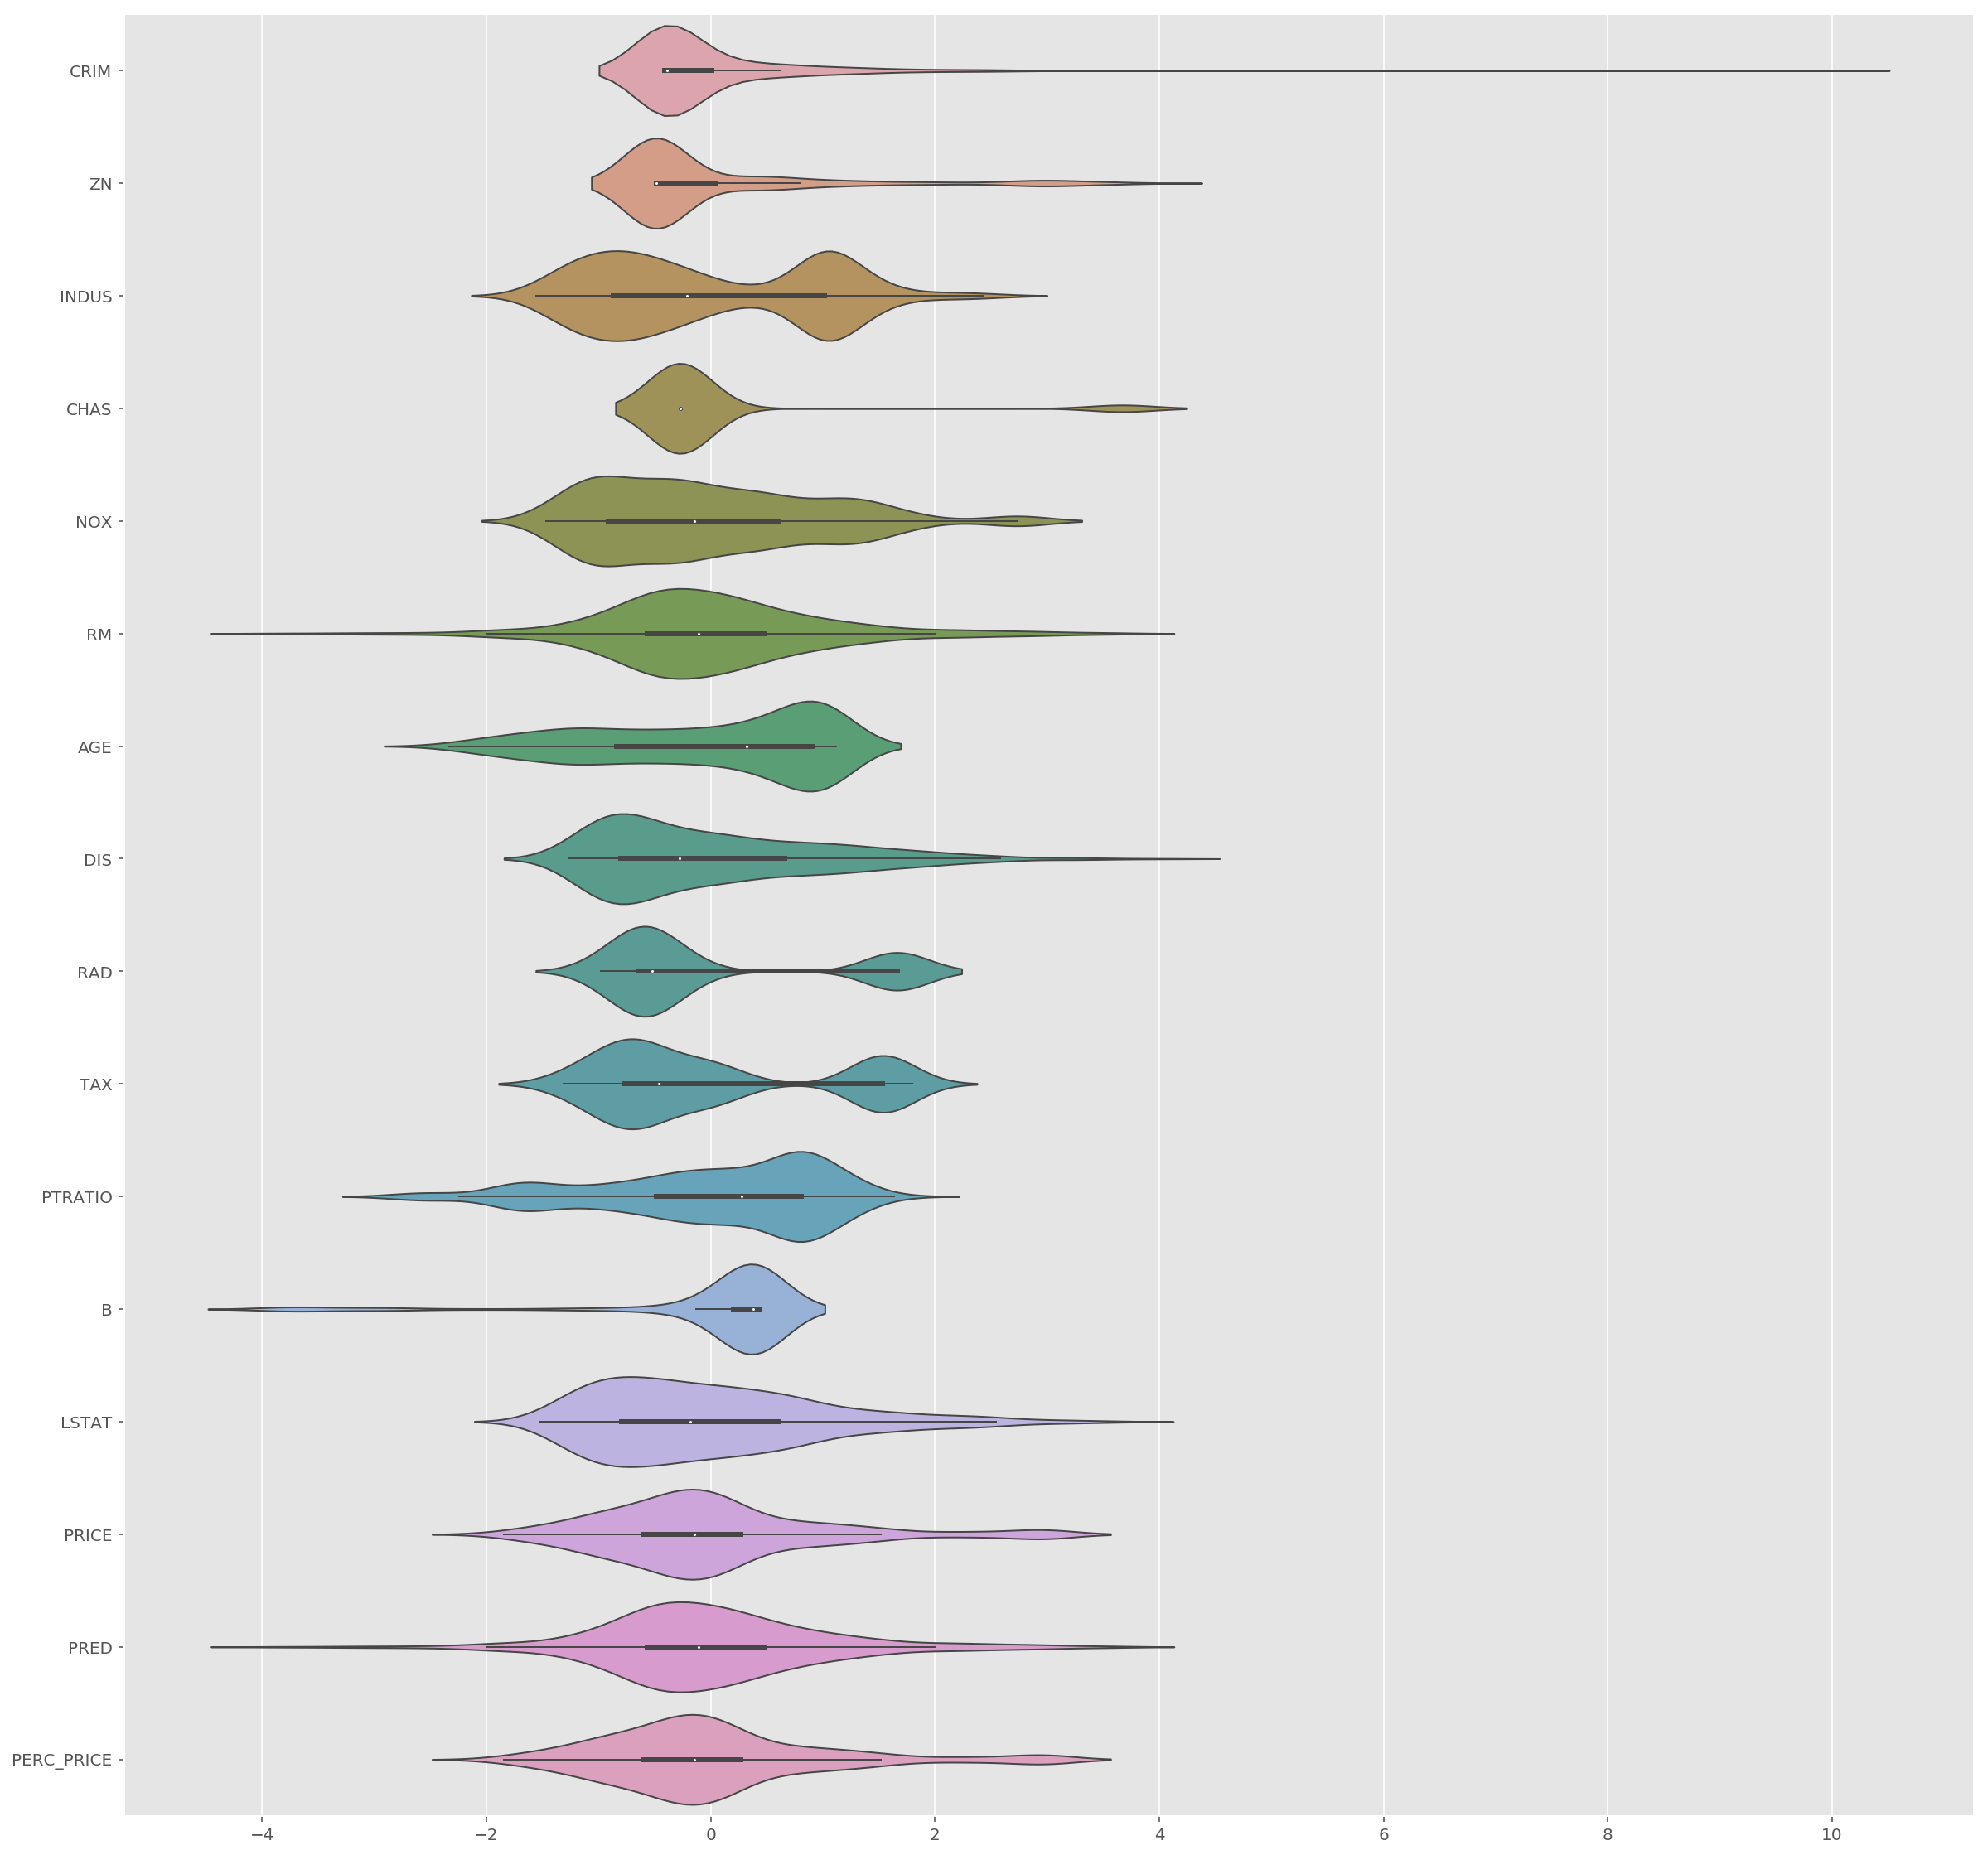

In [13]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca()

ax = sns.violinplot(data=df_norm, orient='h', fliersize=5, scale='width',
                 linewidth=1, notch=False, saturation=0.5, ax=ax, inner='box')
plt.show()

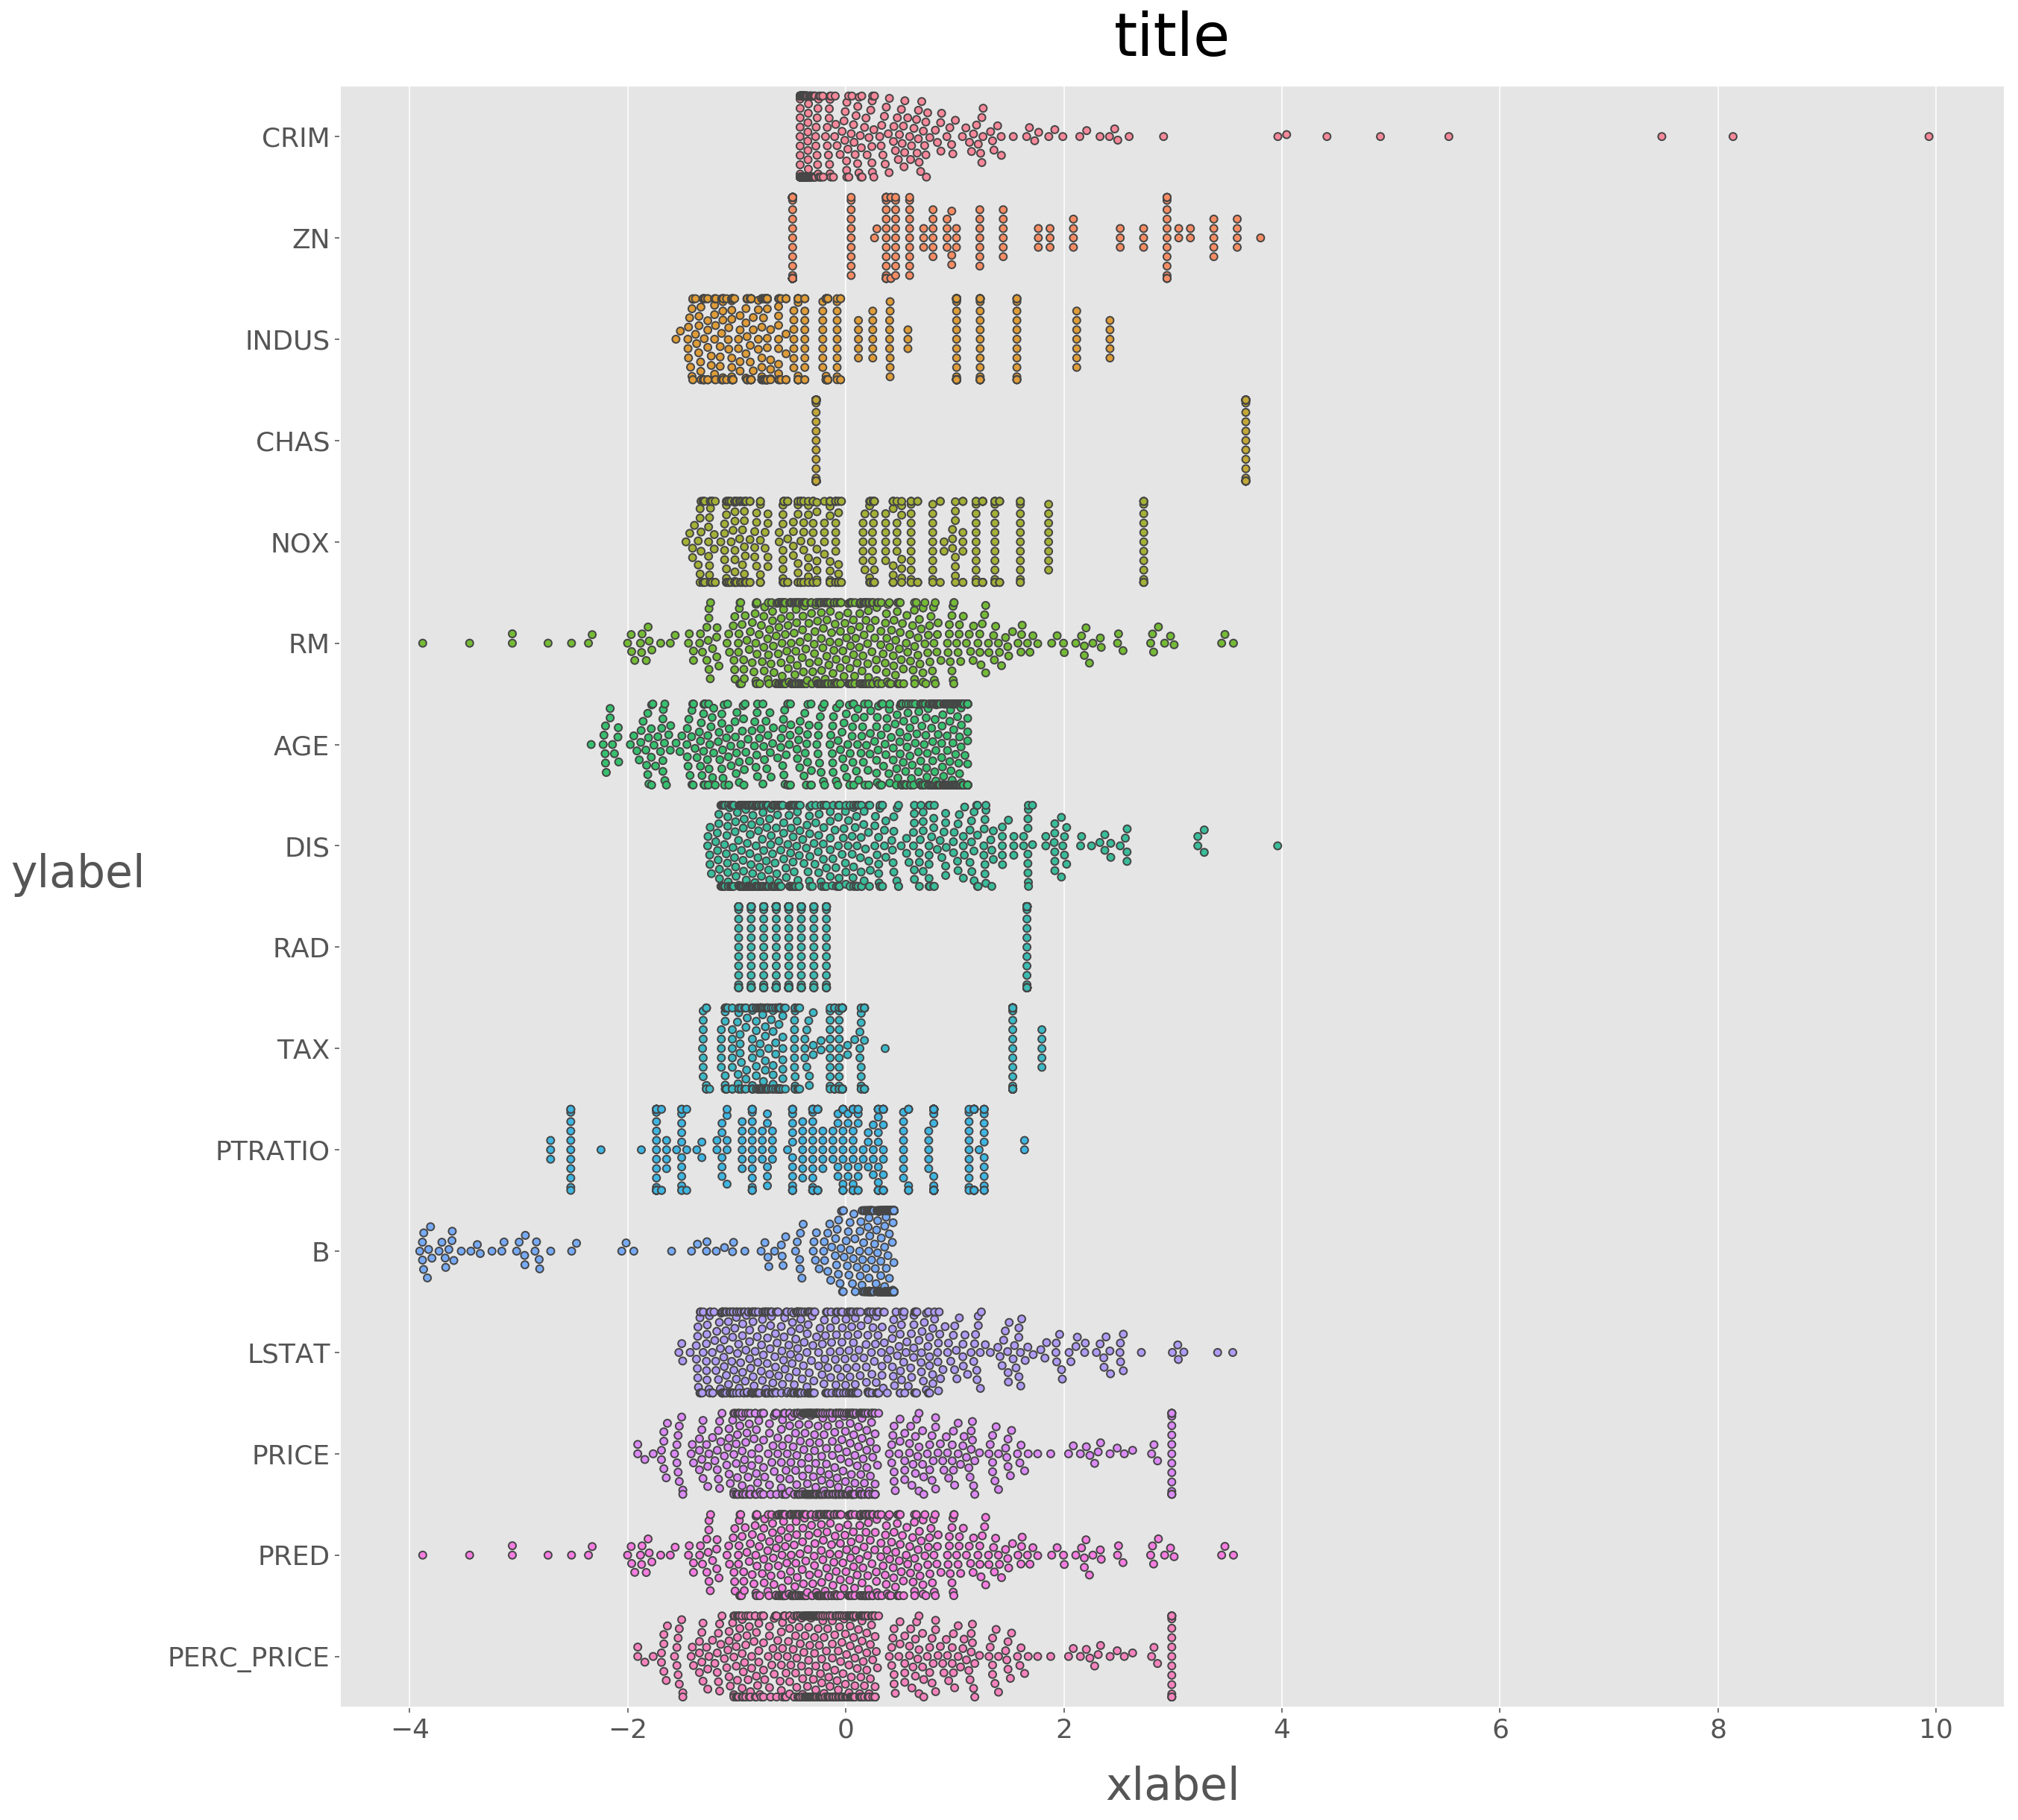

In [14]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()

ax = sns.swarmplot(data=df_norm, orient='h',
                   linewidth=1,  ax=ax)

# plt.show()
# dir(ax)
ax.axes.set_title("title",fontsize=40, pad=20)
ax.set_xlabel("xlabel",fontsize=30, labelpad=15)
ax.set_ylabel("ylabel",fontsize=30, labelpad=60, rotation=0)
ax.tick_params(labelsize=18)
plt.show()

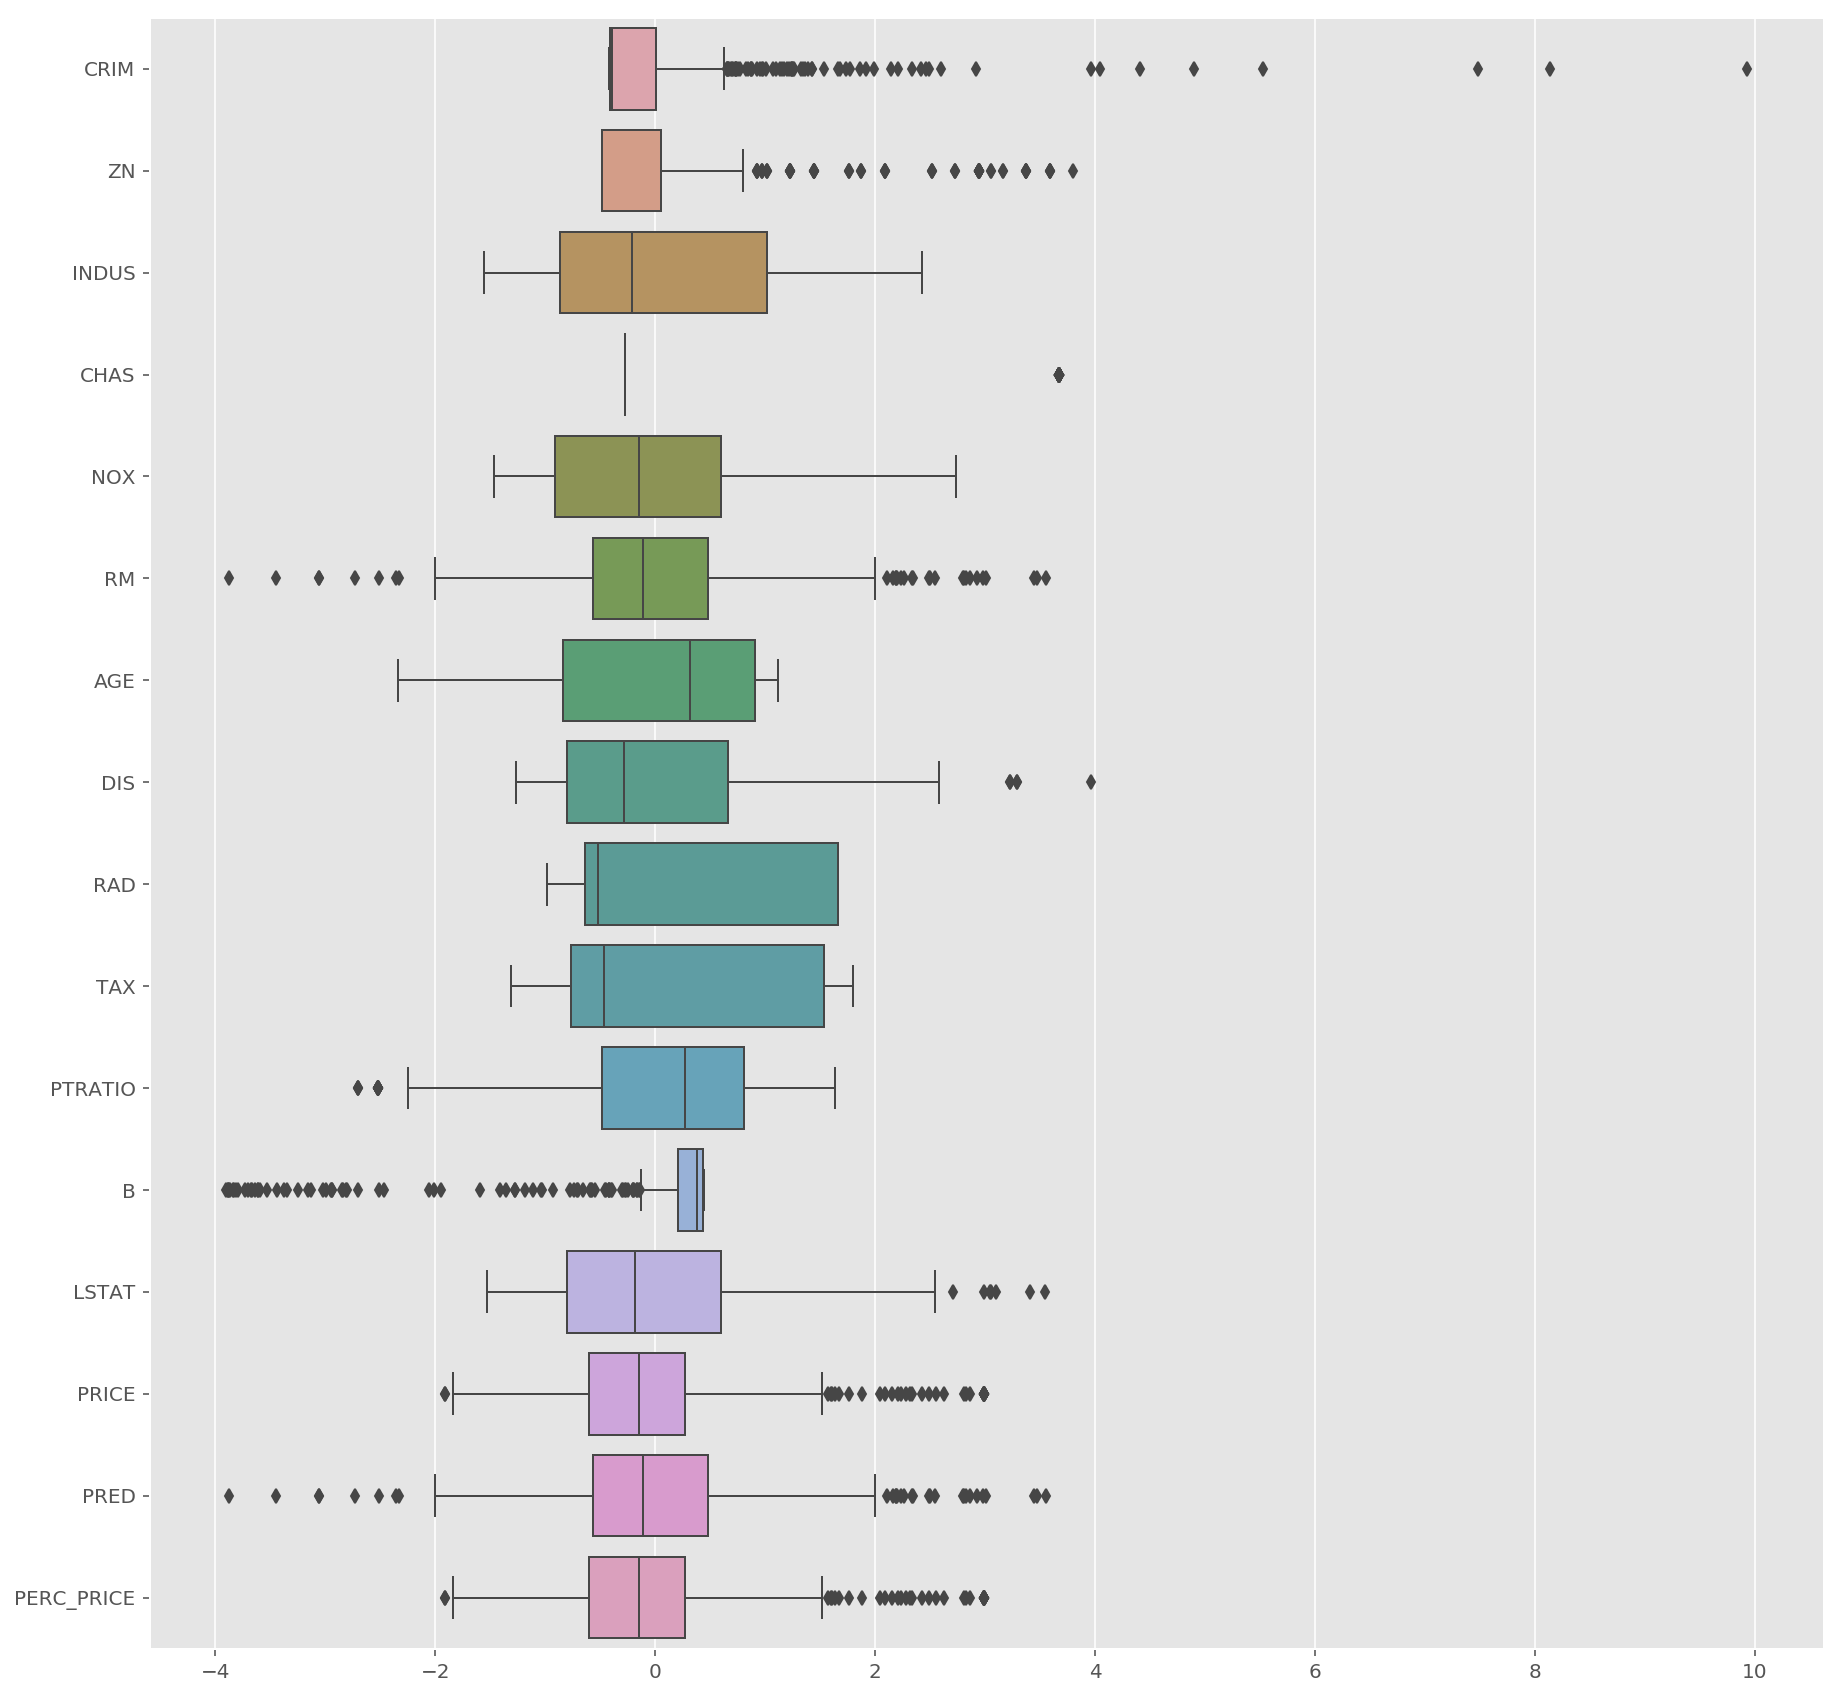

In [15]:
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()

ax = sns.boxplot(data=df_norm, orient='h', fliersize=5, 
                 linewidth=1, notch=False, saturation=0.5, ax=ax)
plt.show()

In [16]:
_pie=df['PERC_PRICE'][:3]/sum(df['PERC_PRICE'][:3])

In [17]:
_pie.index

RangeIndex(start=0, stop=3, step=1)

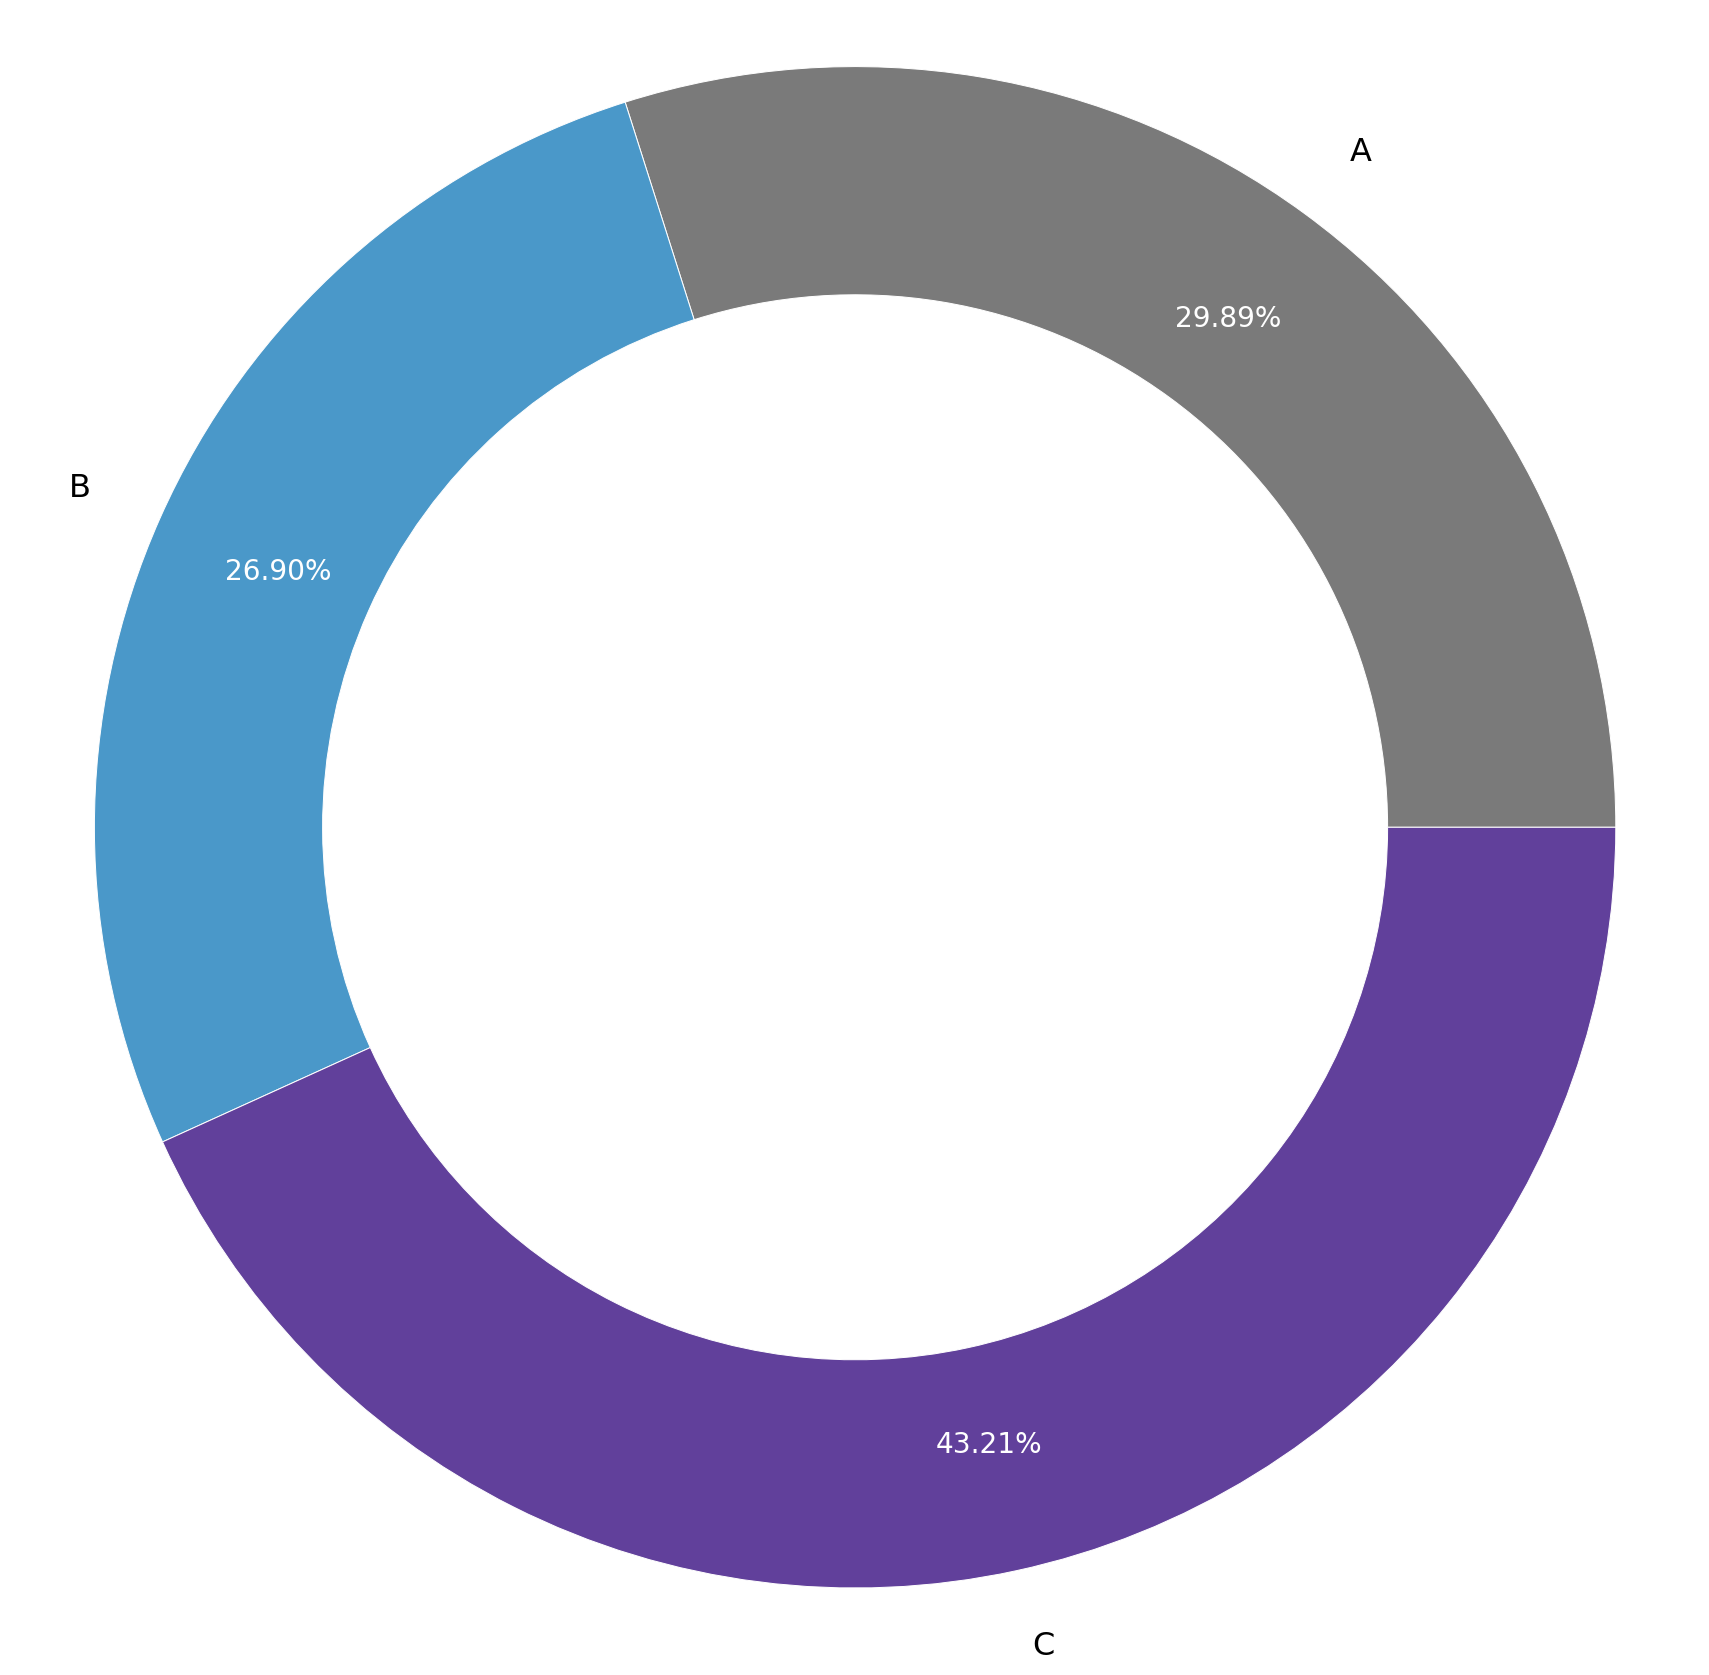

In [18]:
# circle
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
gp1, gp2, gp3 = plt.cm.Greys, plt.cm.Blues, plt.cm.Purples
labels = ['A','B','C']
price_pie, text, autotext = ax.pie(_pie,labels=labels,
                                     colors=[gp1(0.6), gp2(0.6), gp3(.8)], autopct='%.2f%%', pctdistance=.83)

plt.setp(price_pie, width=0.3, edgecolor='white')
plt.setp(text, size=16, color='k')
plt.setp(autotext, size=14, color='w')
    
plt.axis('equal')
plt.show()

In [18]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE', 'PRED', 'PERC_PRICE'],
      dtype='object')

In [19]:
# Load the data
high_corr = pd.read_csv('./housing_high_corr.csv', index_col=0)

In [20]:
high_corr

OverallQual  GrLivArea  ExterQual  KitchenQual  GarageArea  \
OverallQual      1.000000   0.587977   0.722349     0.669679    0.565875   
GrLivArea        0.587977   1.000000   0.425571     0.414446    0.461723   
ExterQual        0.722349   0.425571   1.000000     0.711186    0.499101   
KitchenQual      0.669679   0.414446   0.711186     1.000000    0.489012   
GarageArea       0.565875   0.461723   0.499101     0.489012    1.000000   
1stFlrSF         0.464540   0.531411   0.385883     0.379135    0.480829   
TotalBath        0.576767   0.717824   0.489479     0.441426    0.416747   
BsmtQual         0.628749   0.322542   0.563171     0.507501    0.405869   
GarageFinish     0.555552   0.352035   0.516579     0.470171    0.514223   
TotRmsAbvGrd     0.420018   0.829227   0.288268     0.279122    0.329676   
FireplaceQu      0.485329   0.472256   0.355988     0.348483    0.328112   
Age             -0.566711  -0.193378  -0.594581    -0.524519   -0.483605   
RemodAge        -0.545830  -0.282798  -0.585673    -0.623941   -0.377879   

              1stFlrSF  TotalBath  BsmtQual  GarageFinish  TotRmsAbvGrd  \
OverallQual   0.464540   0.576767  0.628749      0.555552      0.420018   
GrLivArea     0.531411   0.717824  0.322542      0.352035      0.829227   
ExterQual     0.385883   0.489479  0.563171      0.516579      0.288268   
KitchenQual   0.379135   0.441426  0.507501      0.470171      0.279122   
GarageArea    0.480829   0.416747  0.405869      0.514223      0.329676   
1stFlrSF      1.000000   0.270703  0.286487      0.332047      0.394813   
TotalBath     0.270703   1.000000  0.408471      0.445671      0.613616   
BsmtQual      0.286487   0.408471  1.000000      0.483137      0.179503   
GarageFinish  0.332047   0.445671  0.483137      1.000000      0.235560   
TotRmsAbvGrd  0.394813   0.613616  0.179503      0.235560      1.000000   
FireplaceQu   0.409095   0.330135  0.303832      0.392804      0.350735   
Age          -0.276565  -0.497661 -0.602115     -0.594397     -0.091947   
RemodAge     -0.232651  -0.446966 -0.515061     -0.443944     -0.186247   

              FireplaceQu       Age  RemodAge  
OverallQual      0.485329 -0.566711 -0.545830  
GrLivArea        0.472256 -0.193378 -0.282798  
ExterQual        0.355988 -0.594581 -0.585673  
KitchenQual      0.348483 -0.524519 -0.623941  
GarageArea       0.328112 -0.483605 -0.377879  
1stFlrSF         0.409095 -0.276565 -0.232651  
TotalBath        0.330135 -0.497661 -0.446966  
BsmtQual         0.303832 -0.602115 -0.515061  
GarageFinish     0.392804 -0.594397 -0.443944  
TotRmsAbvGrd     0.350735 -0.091947 -0.186247  
FireplaceQu      1.000000 -0.219895 -0.190042  
Age             -0.219895  1.000000  0.590486  
RemodAge        -0.190042  0.590486  1.000000

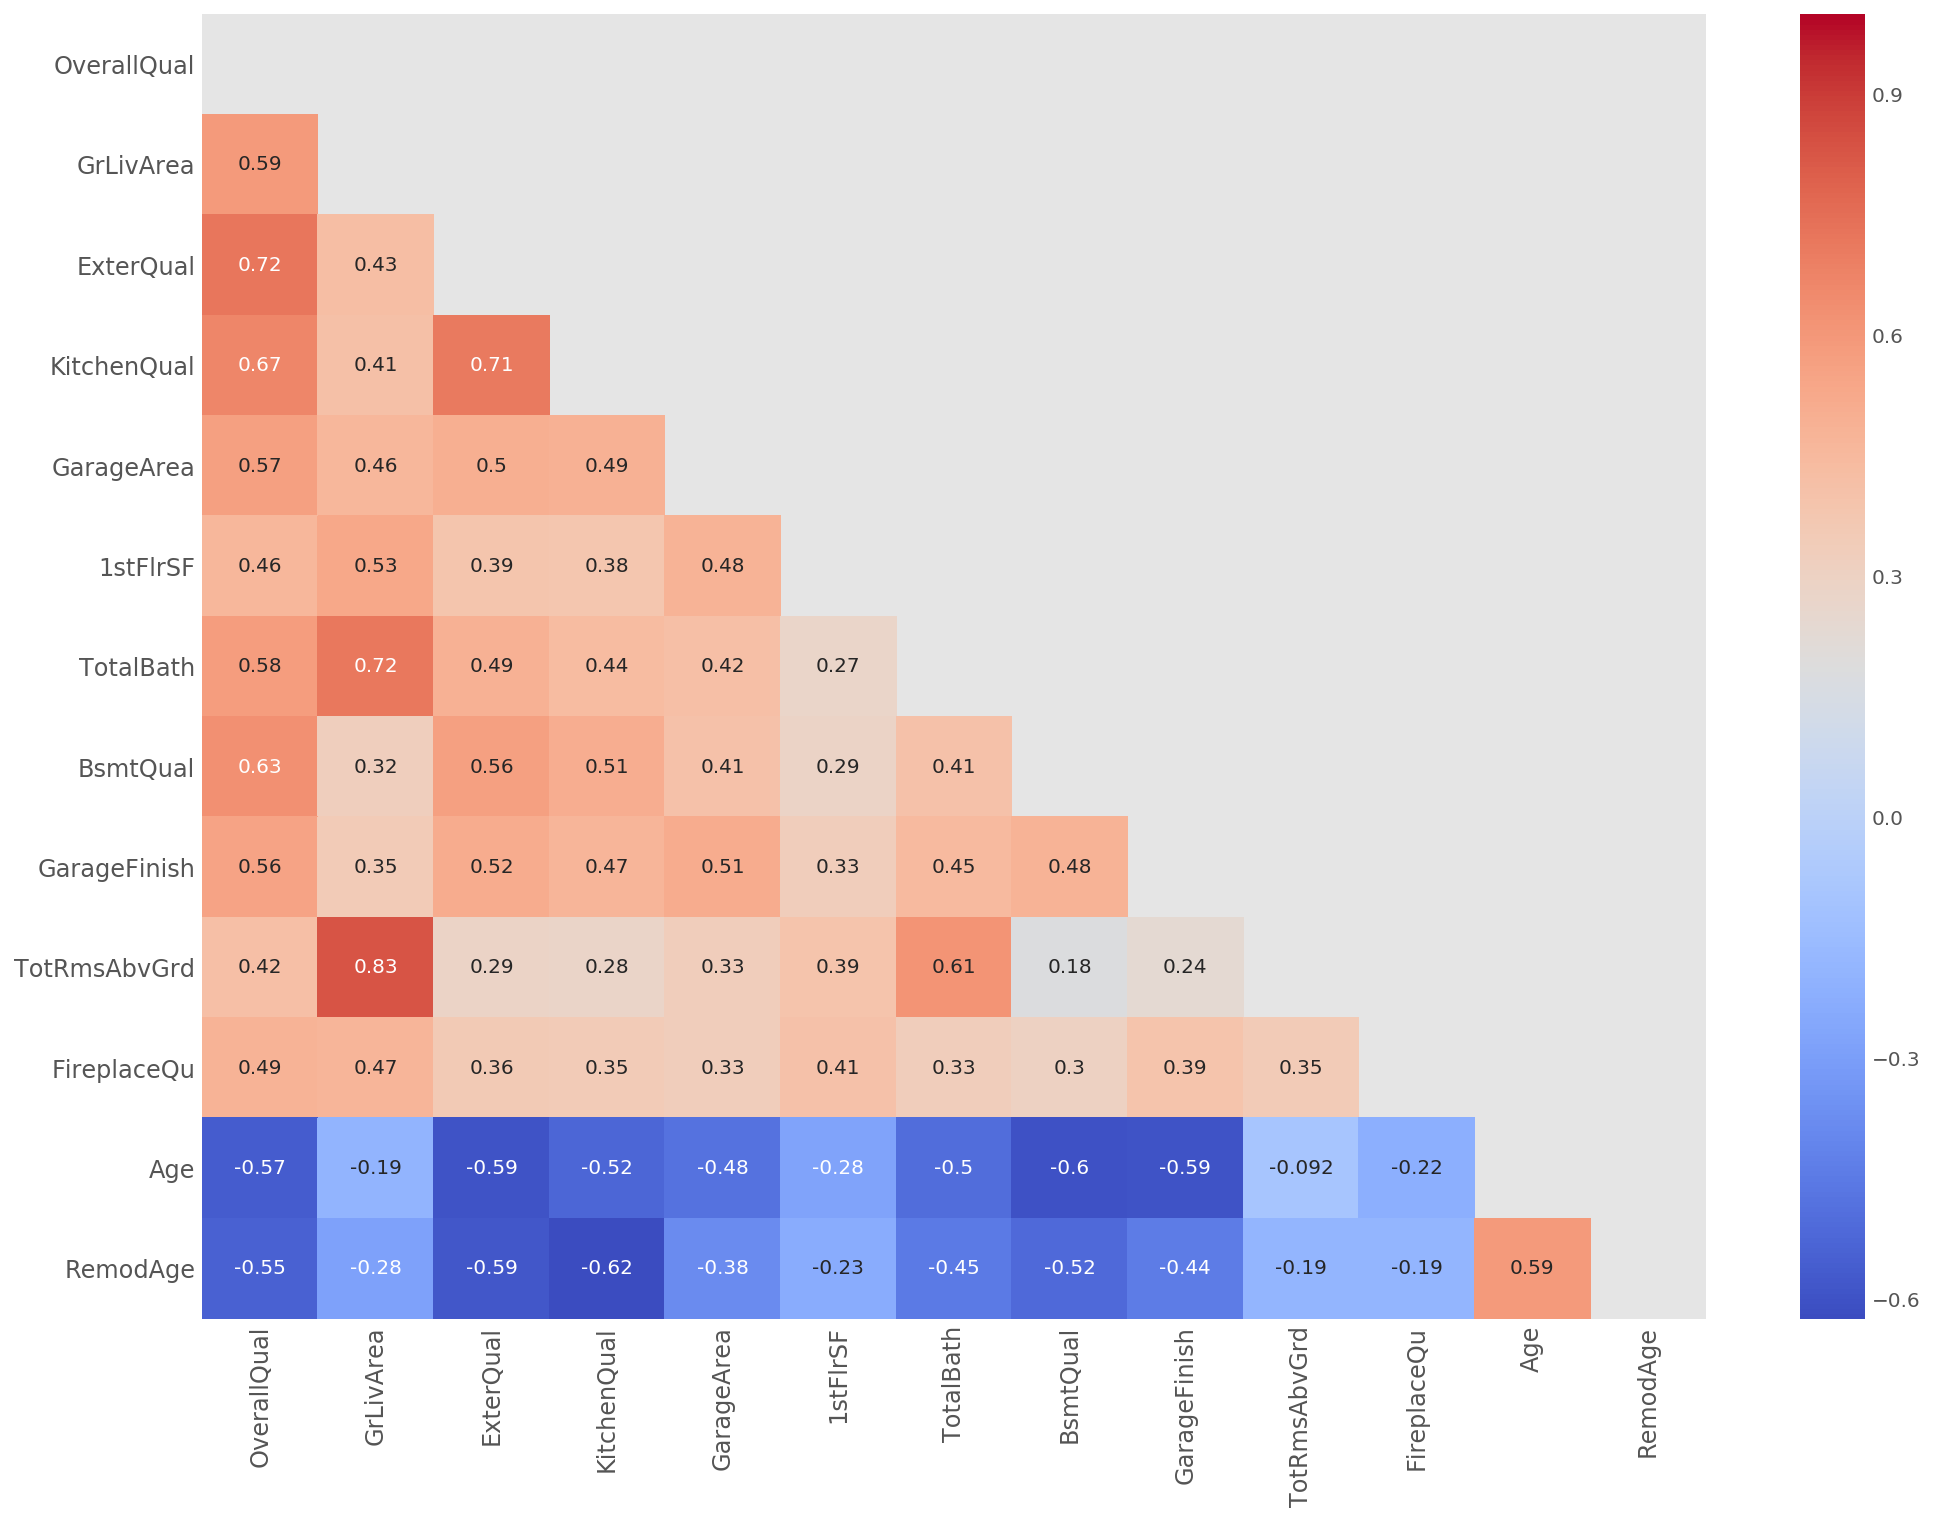

In [21]:
#Create a heatmap using only the variables with a high
fig, ax = plt.subplots(figsize=(15,12))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(high_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(high_corr, mask=mask,cmap="coolwarm",  ax=ax, annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12)
plt.show()

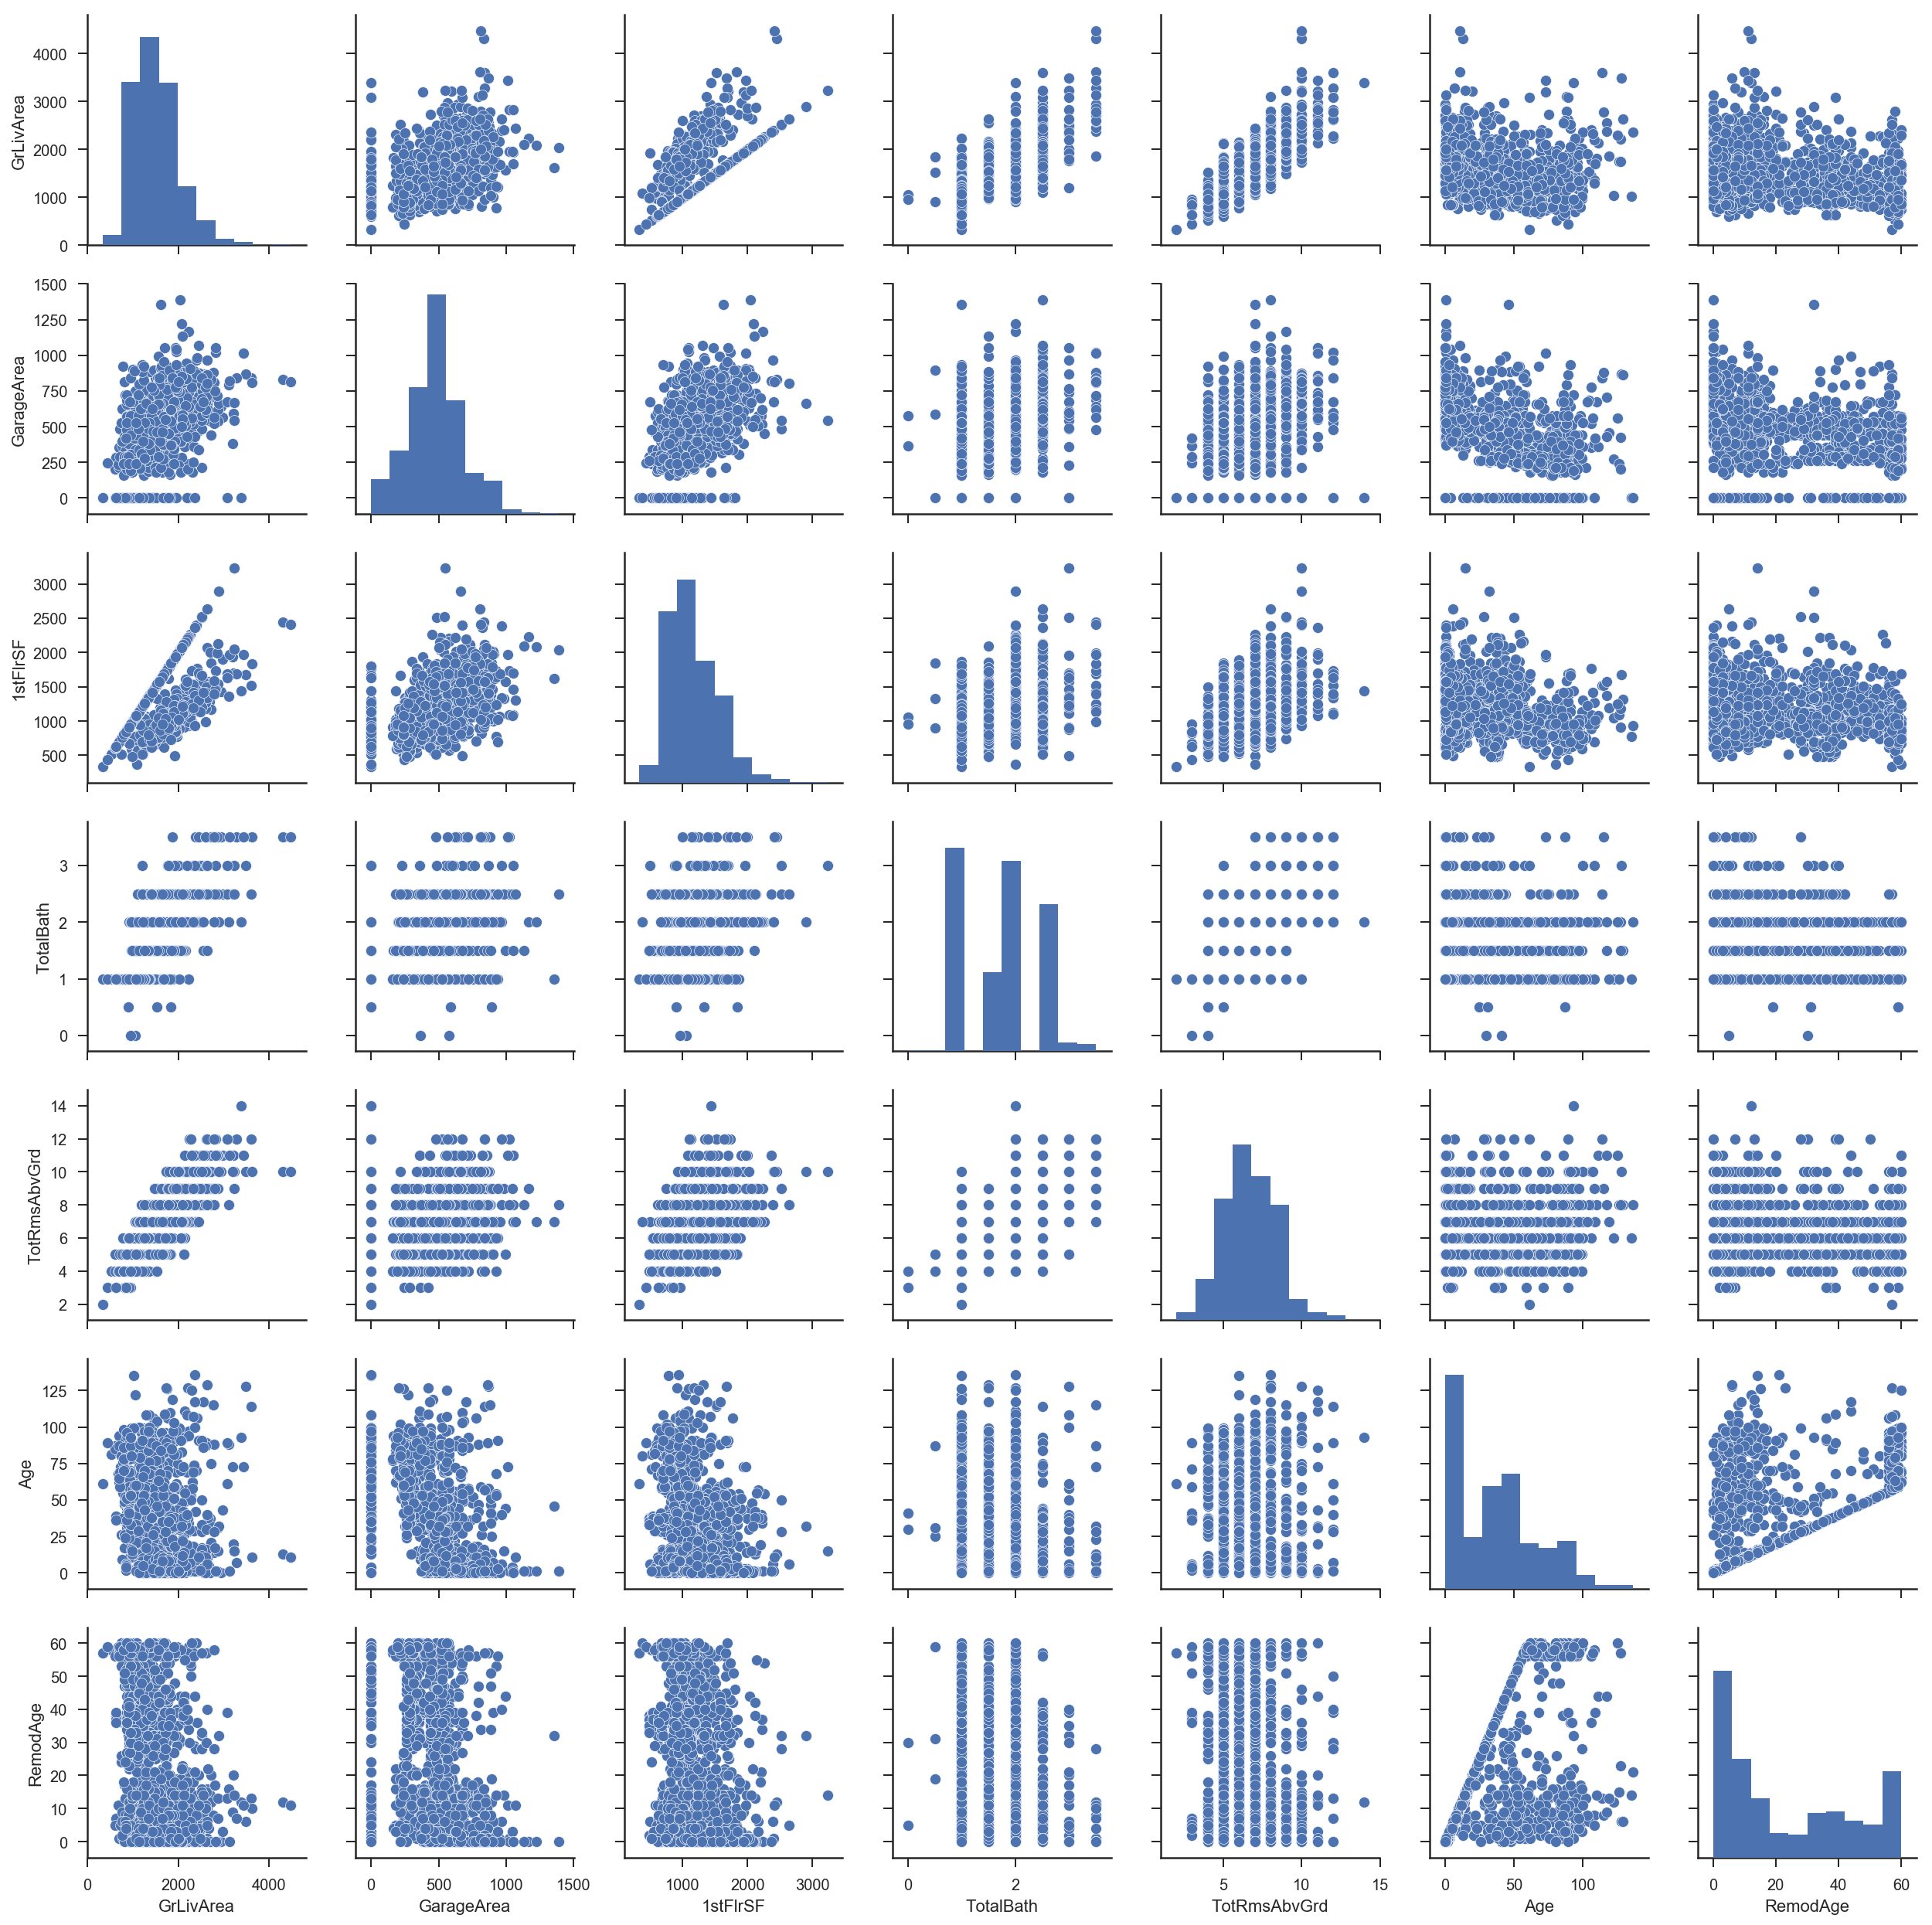

In [22]:
properties=pd.read_csv('housing_properties.csv',index_col=0)
Fixed_corr = ['GrLivArea', 'GarageArea', '1stFlrSF', 'TotalBath', 'TotRmsAbvGrd', 'Age', 'RemodAge']
#Display pairplot of highest correlating variables to identify collinearity.
sns.set(style="ticks", color_codes=True)
sns.pairplot(properties, vars=Fixed_corr, palette=sns.xkcd_palette(['windows blue', 'amber']))
plt.show()

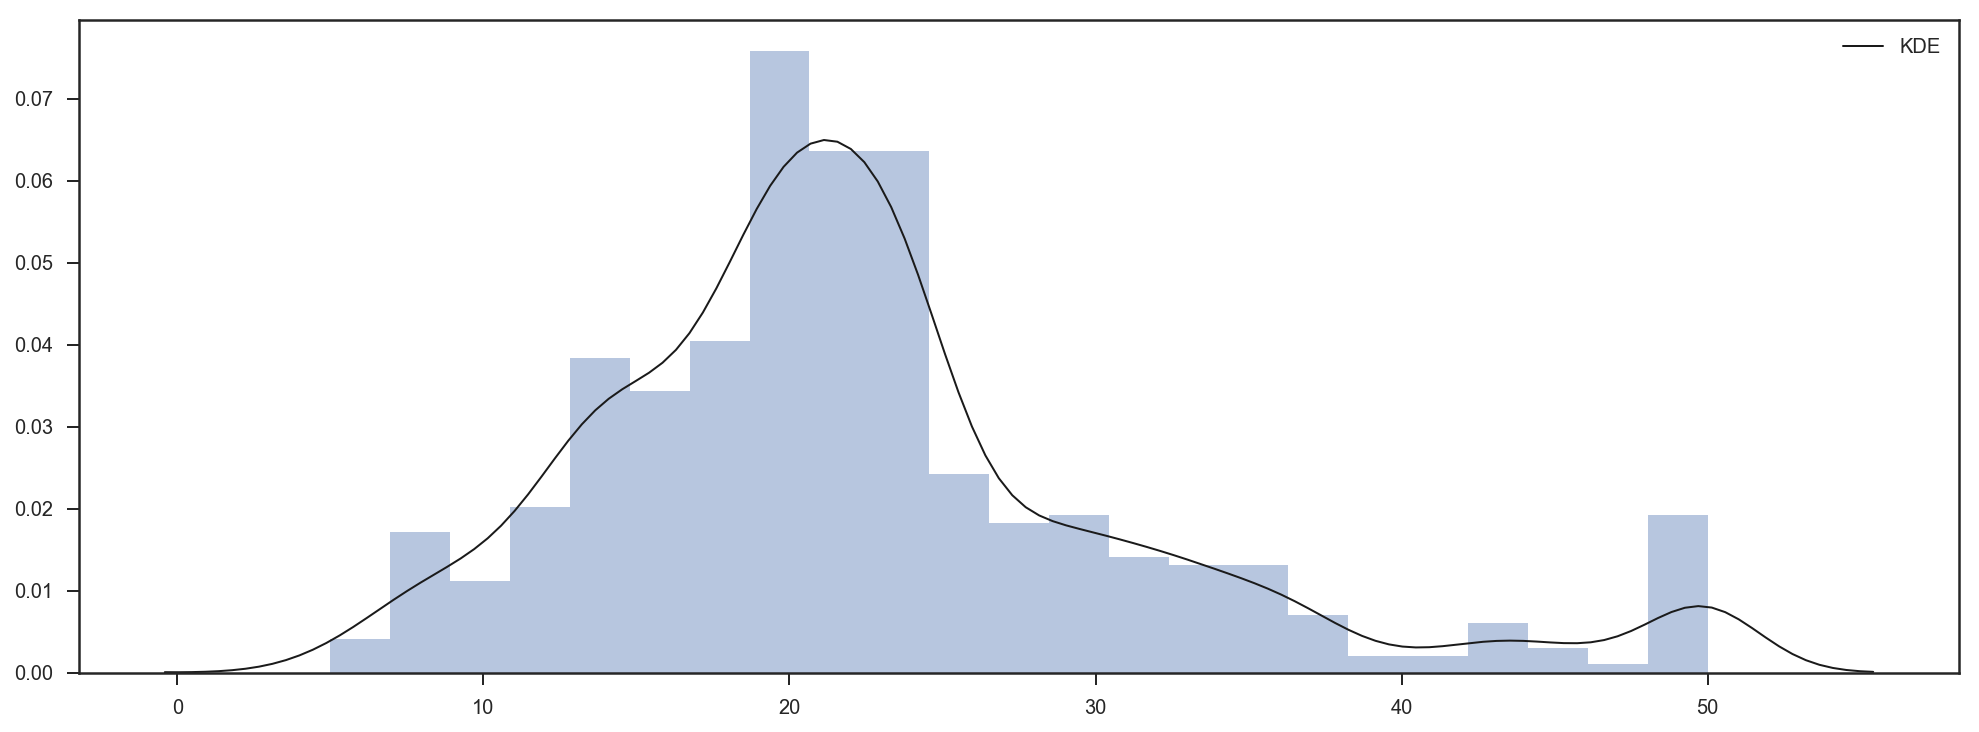

In [23]:
# the distribution seems to follow a lognormal distribution
plt.figure(figsize=(15, 6))
sns.distplot(y,kde_kws={"color": "k", "lw": 1, "label": "KDE"});

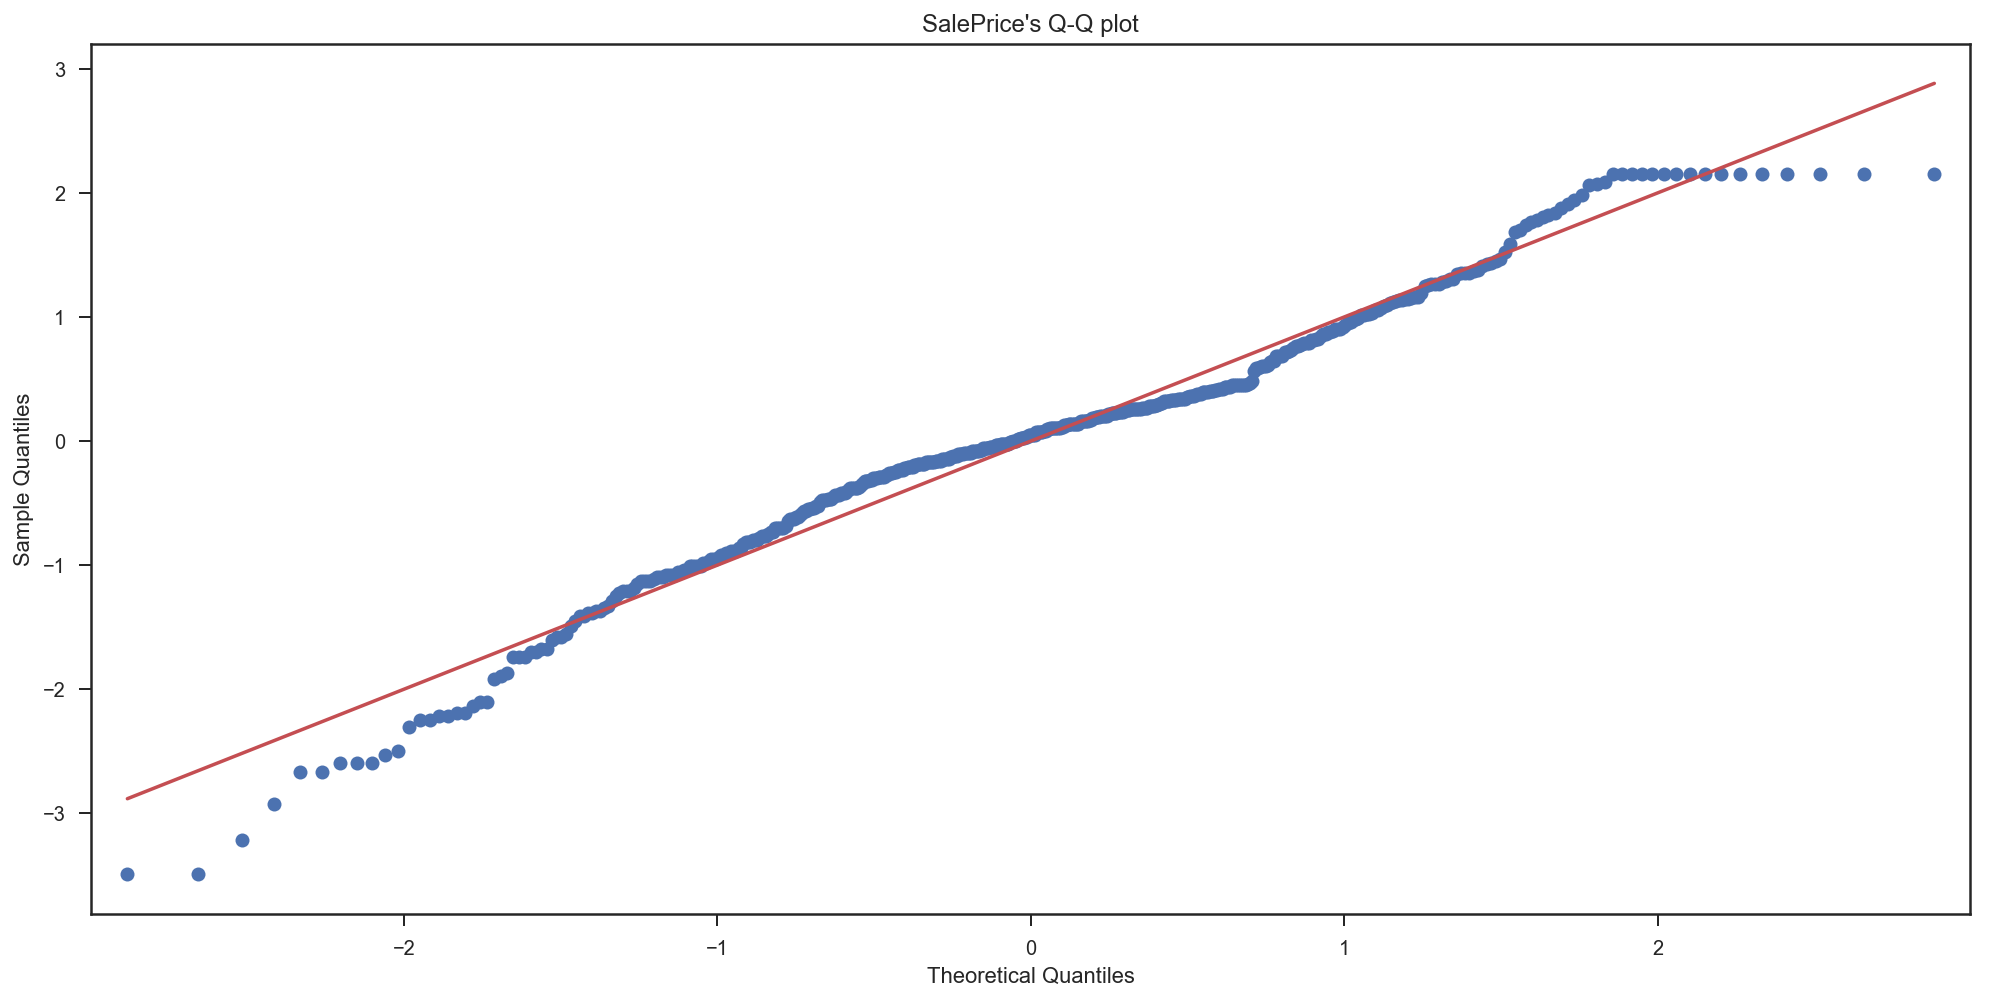

In [24]:
# plot the Q-Q plot in order to check whether or not the logarithm of the saleprice is normally distributed
fig = plt.figure(figsize=(15, 8))
ax = plt.gca()
qqplot(np.array(y_log),line='s',fit=True, ax=ax)
ax.set_title("SalePrice's Q-Q plot");

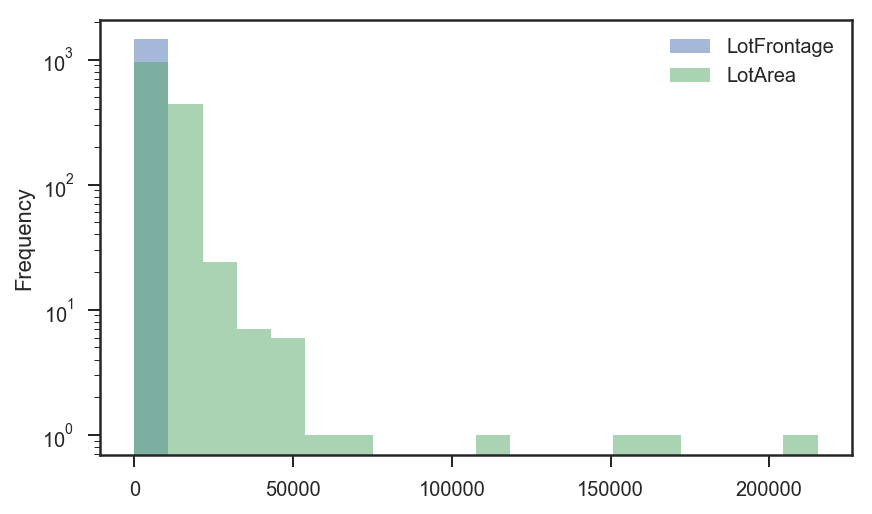

In [25]:
fig, ax = plt.subplots()
properties.iloc[:,[0,1,2,3,4]].plot(kind='hist',bins=20,ax=ax,alpha=0.5)
ax.set_yscale('log')
plt.show()

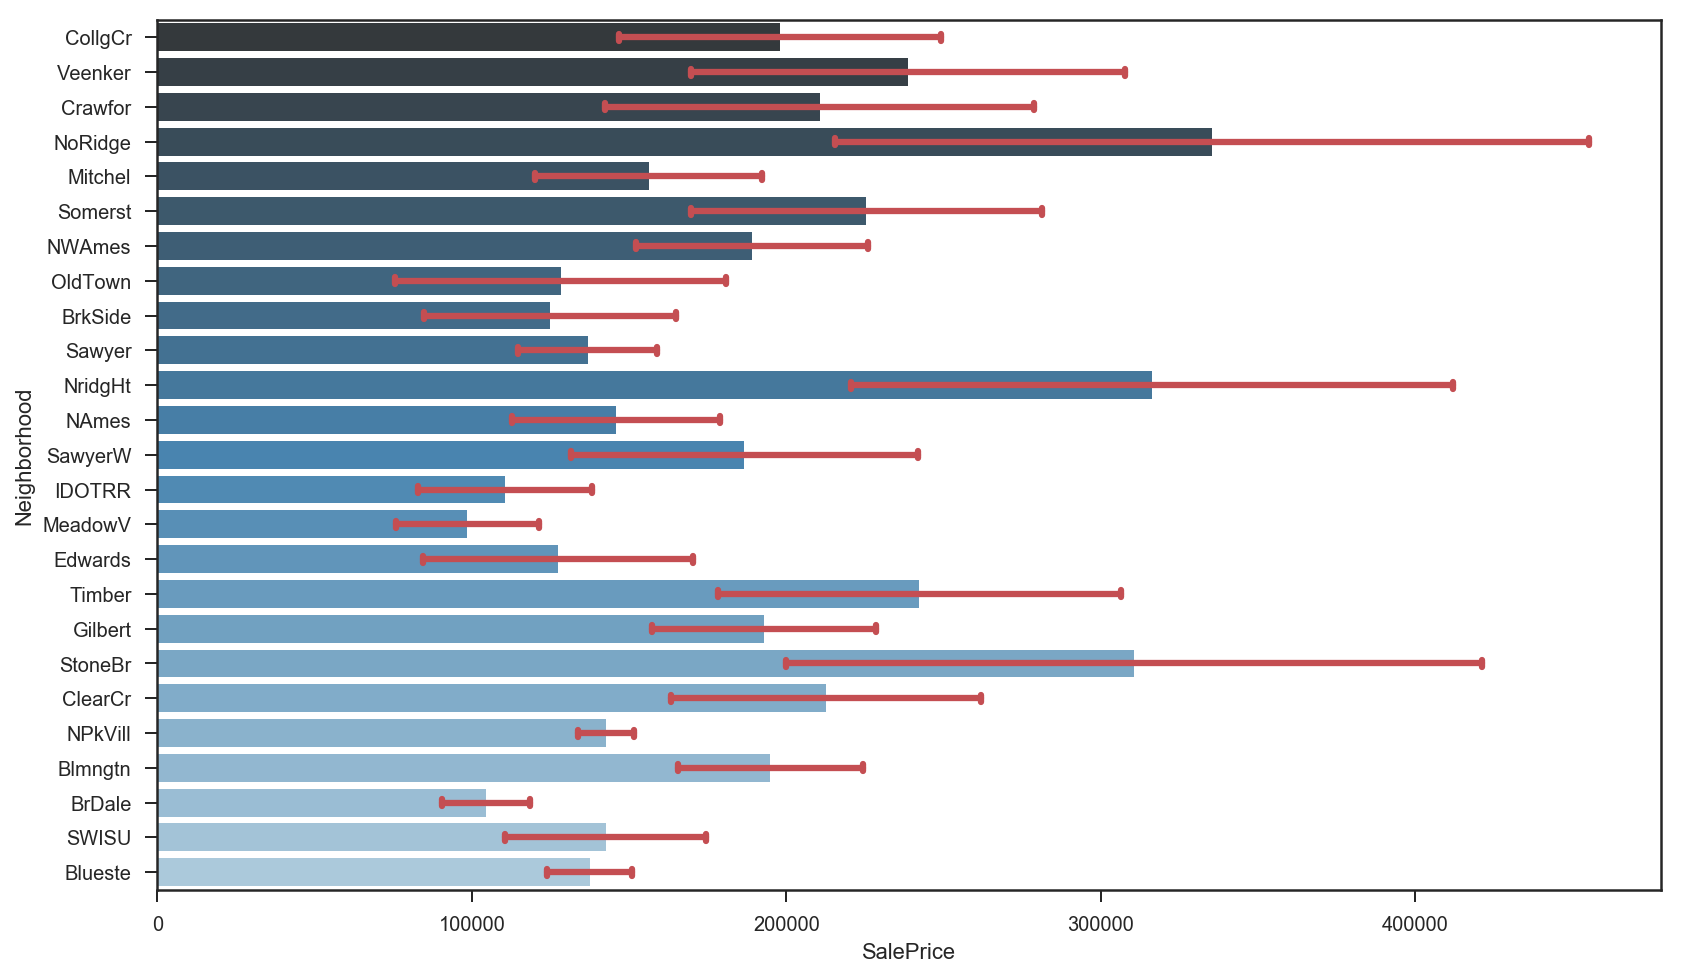

In [26]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='SalePrice', y='Neighborhood', data=properties,
            palette='Blues_d', orient='h', errcolor='r', capsize=.2, ci='sd')
plt.show()

In [27]:
coefs = pd.Series(data=df.PRED)[:30]
mask=np.random.choice(len(coefs)-1,size=int(len(coefs)/2),replace=False)
coefs[mask]=coefs[mask]*(-1)
# sort the series
coefs = coefs.sort_values(ascending=False).reset_index(drop=True)

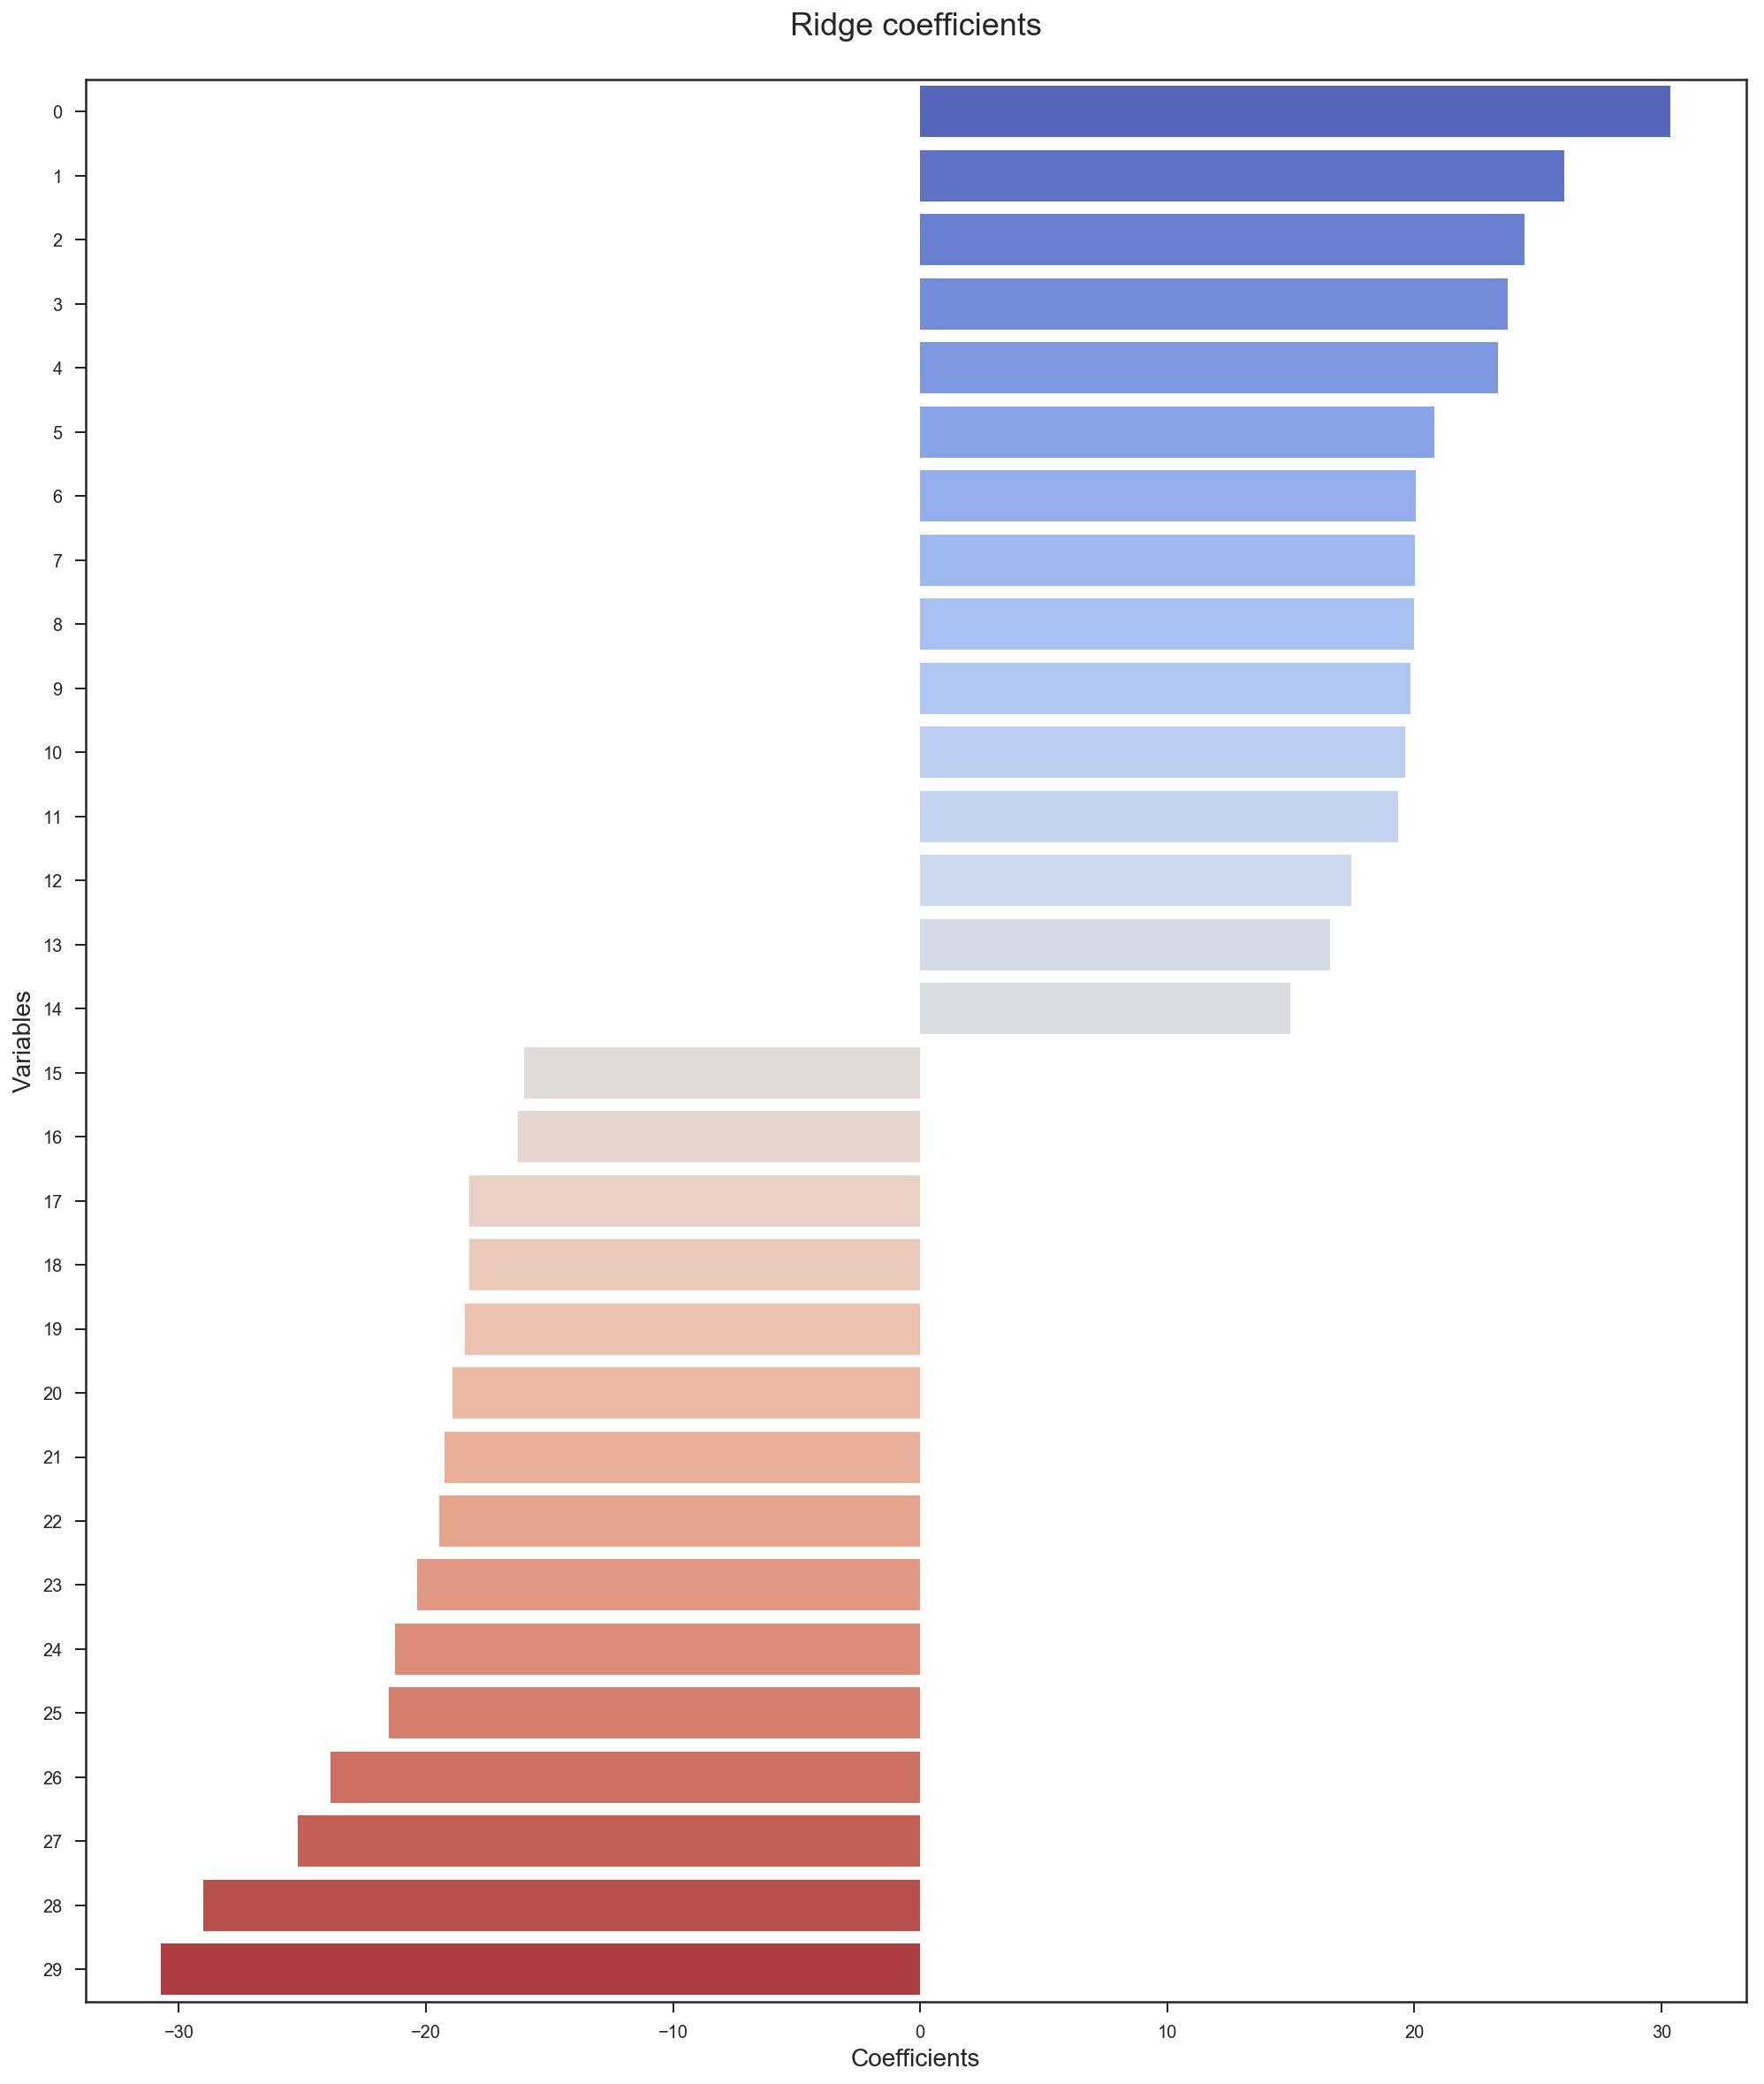

In [28]:
# create a barplot
plt.figure(figsize=(15, 20))
plt.title('Ridge coefficients\n', fontsize=18)
plt.xlabel('Coefficients', fontsize=14)
plt.ylabel('Variables', fontsize=14)
sns.barplot(y=coefs.index, x=coefs.values, orient='h', palette='coolwarm')
sns.color_palette()
plt.show()

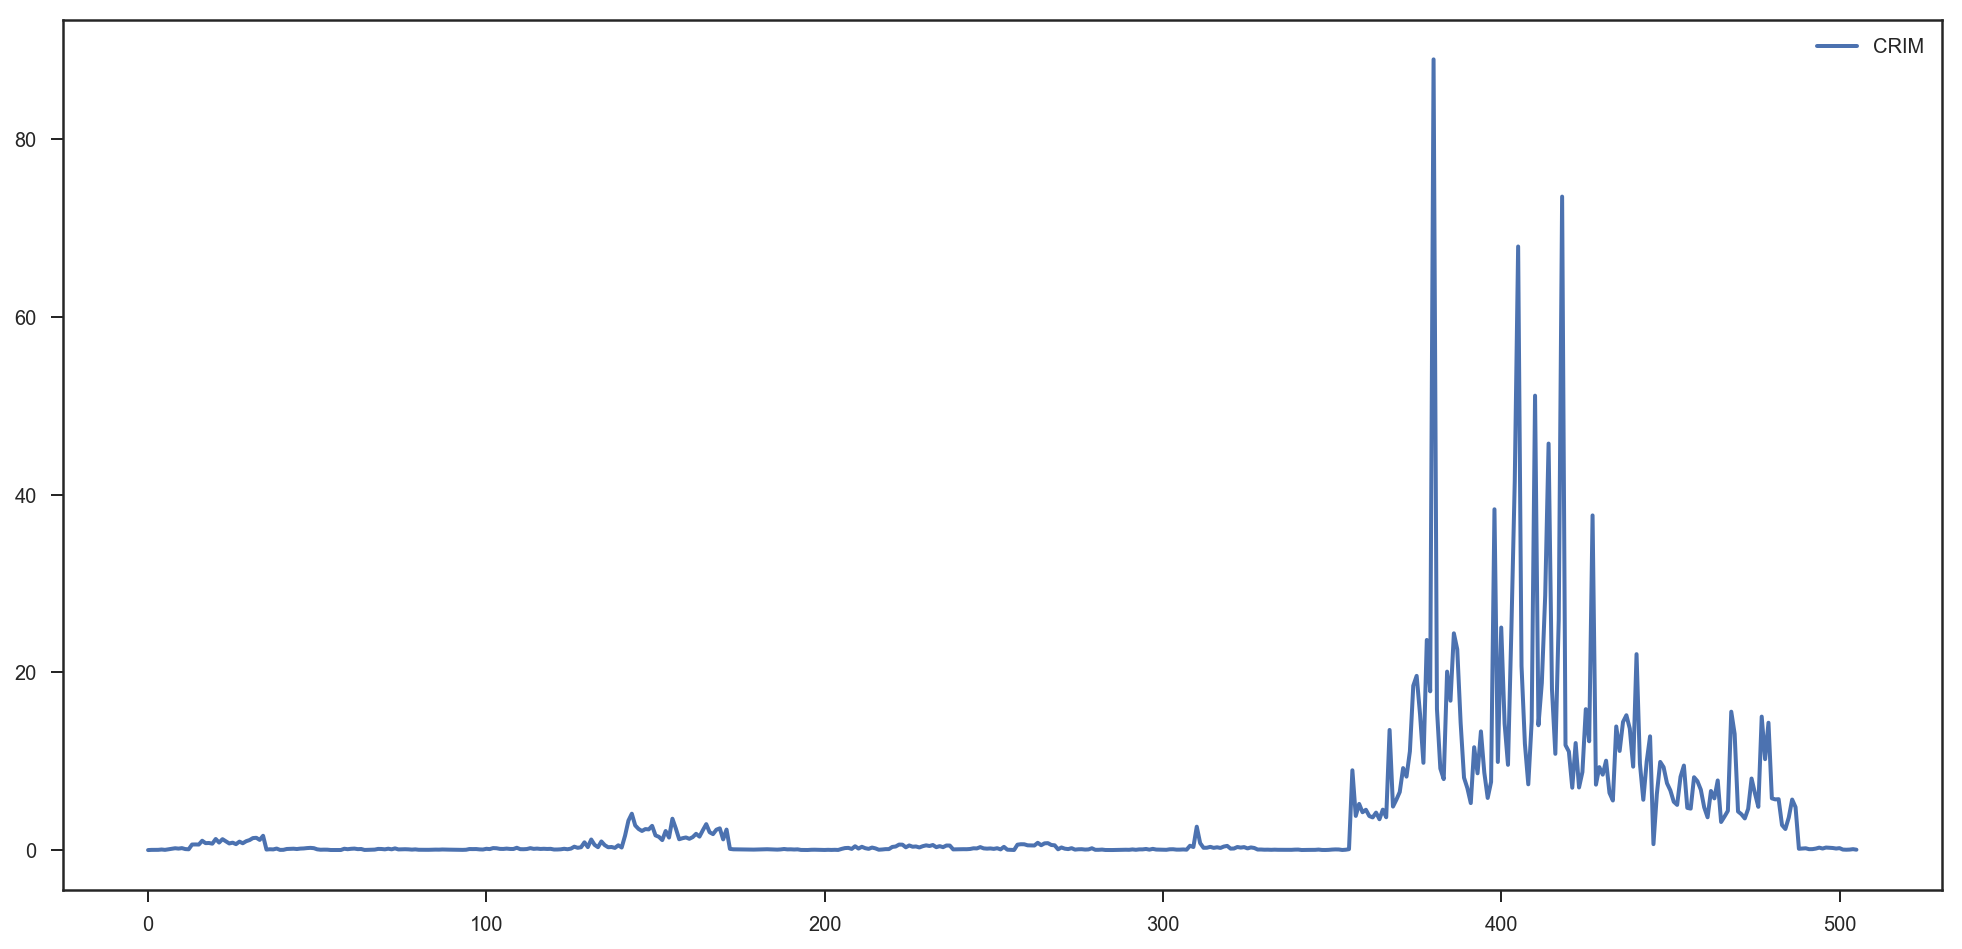

In [29]:
df.iloc[:,[0]].plot(figsize=(15,8), lw=2)

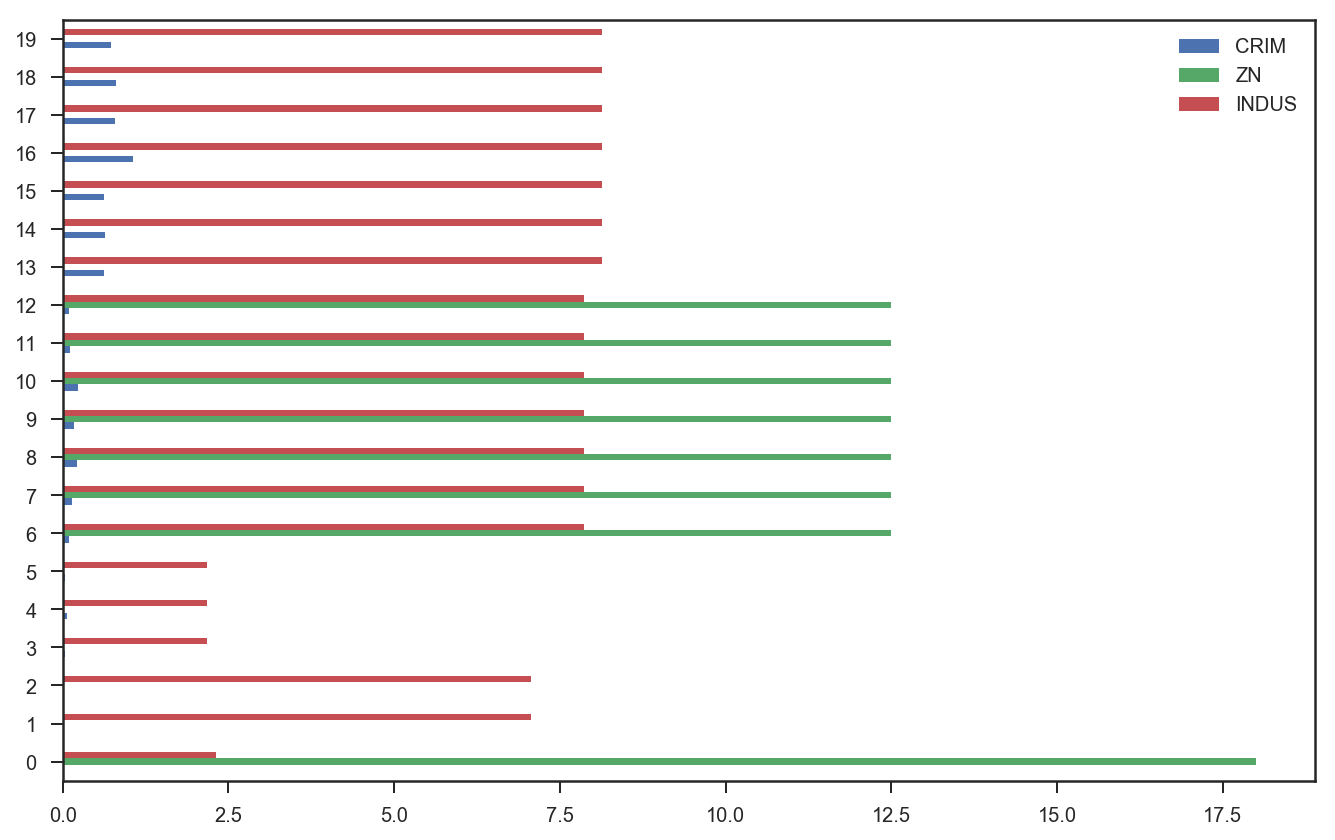

In [30]:
df.iloc[:20,[0,1,2]].plot(kind='barh', figsize=(10,7))

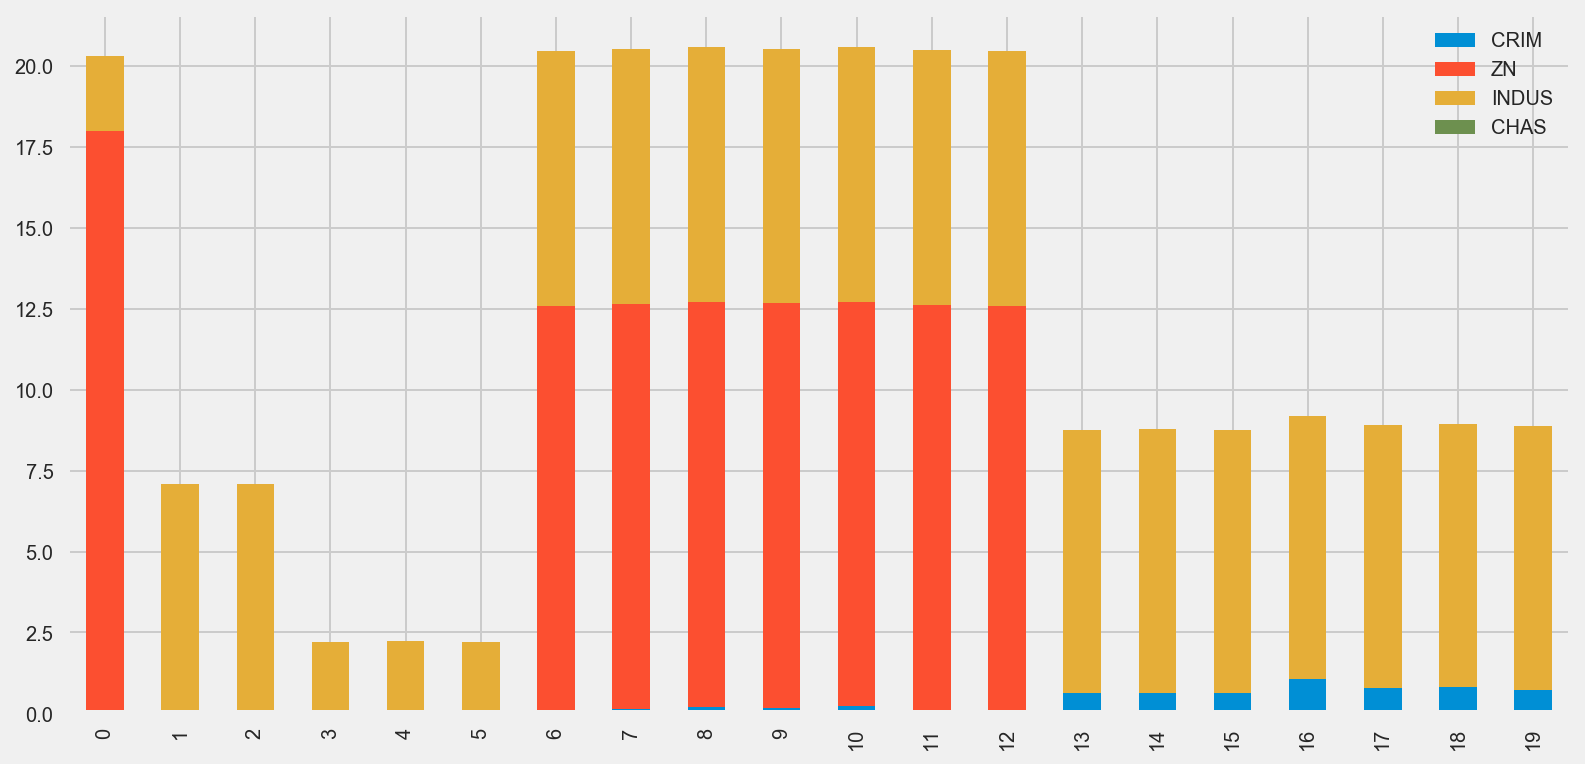

In [33]:
plt.style.use('fivethirtyeight')
df.iloc[:20,[0,1,2,3]].plot(kind='bar', stacked=True, figsize=(12,6))

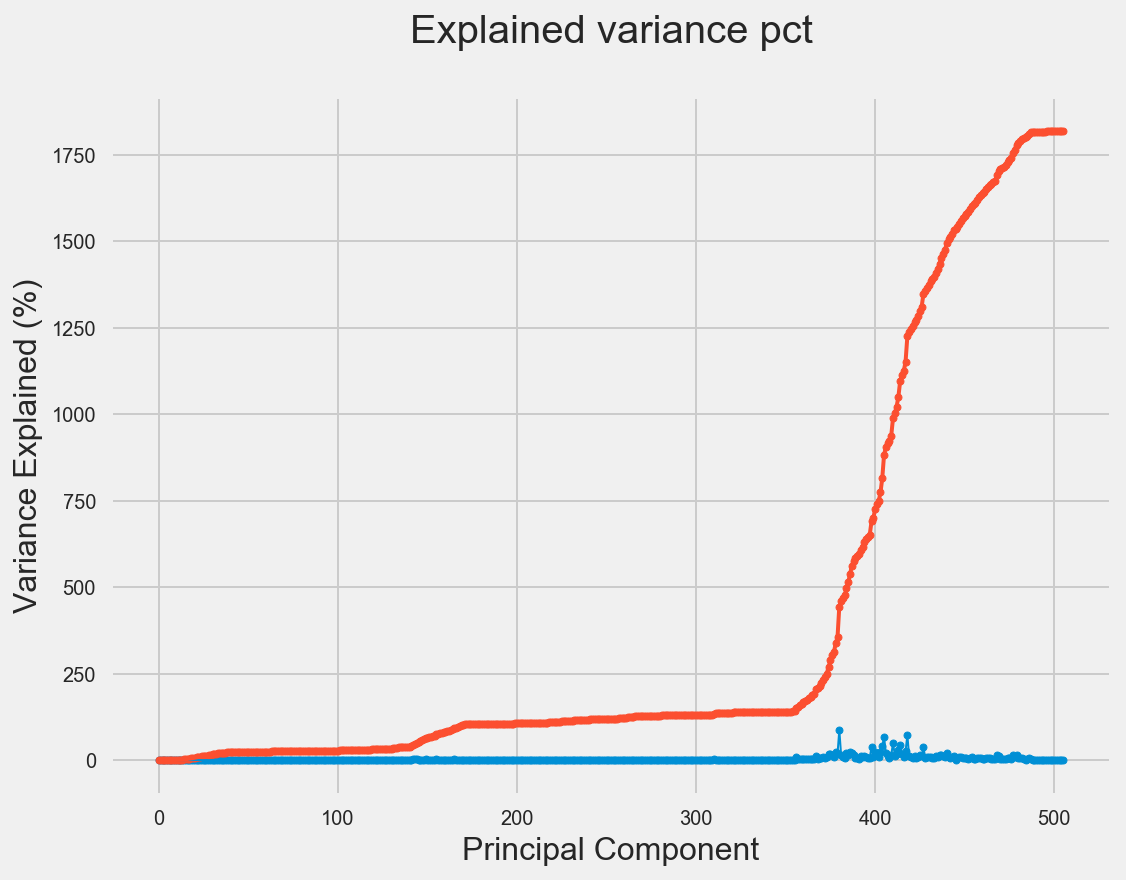

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))
x = range(len(df['CRIM']))
ax.plot(x, df['CRIM'], lw=1)
ax.scatter(x, df['CRIM'], s=12)
ax.plot(x, np.cumsum(df['CRIM']), lw=2)
ax.scatter(x, np.cumsum(df['CRIM']), s=12)
ax.set_title('Explained variance pct\n', fontsize=20)
ax.set_xlabel('Principal Component', fontsize=16)
ax.set_ylabel('Variance Explained (%)', fontsize=16)
plt.show()